In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
import pymc3 as pm

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

import logging
logger = logging.getLogger("pymc3")
logger.propagate = False

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
df = pd.read_csv("outputs/enumeration/sumdata_enumeration.csv")
data = df[['5-accuracy', 'total_resp']] 
data.head()

5-accuracy  total_resp
0          34          40
1          40          40
2          28          40
3          38          40
4          27          40

# unpooled model for one condition 

In [43]:
def get_pooled_trace(data, condition):
    with pm.Model() as unpooled_model: 
        # Independent parameters for each participant
        total_resp = pm.Data("total_resp", data.total_resp.values)
        # prior on theta: 
        theta = pm.Uniform("theta", lower=0, upper=1)
        # likelihood
        binom = pm.Binomial("binomial", p=theta, n=total_resp, observed=data[condition])
        unpooled_trace = pm.sample(2000, return_inferencedata=True)
    return unpooled_trace

# Pooled model for all condition in task

In [46]:
all_traces = {}
for col in df.columns: 
    if col != 'total_resp':
        data = df[[col, 'total_resp']]
        all_traces[col] = get_pooled_trace(data, col)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for bot

/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/adolphemaxime/.local/share/virtualenvs/Results_anal

/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 63 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Pyth

/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 44 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.ten

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 46 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.c

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 46 seconds.
The acceptance probability does not match the target. It is 0.879618053415241, but should be close to 0.8. Try to increase the number of tuning steps.


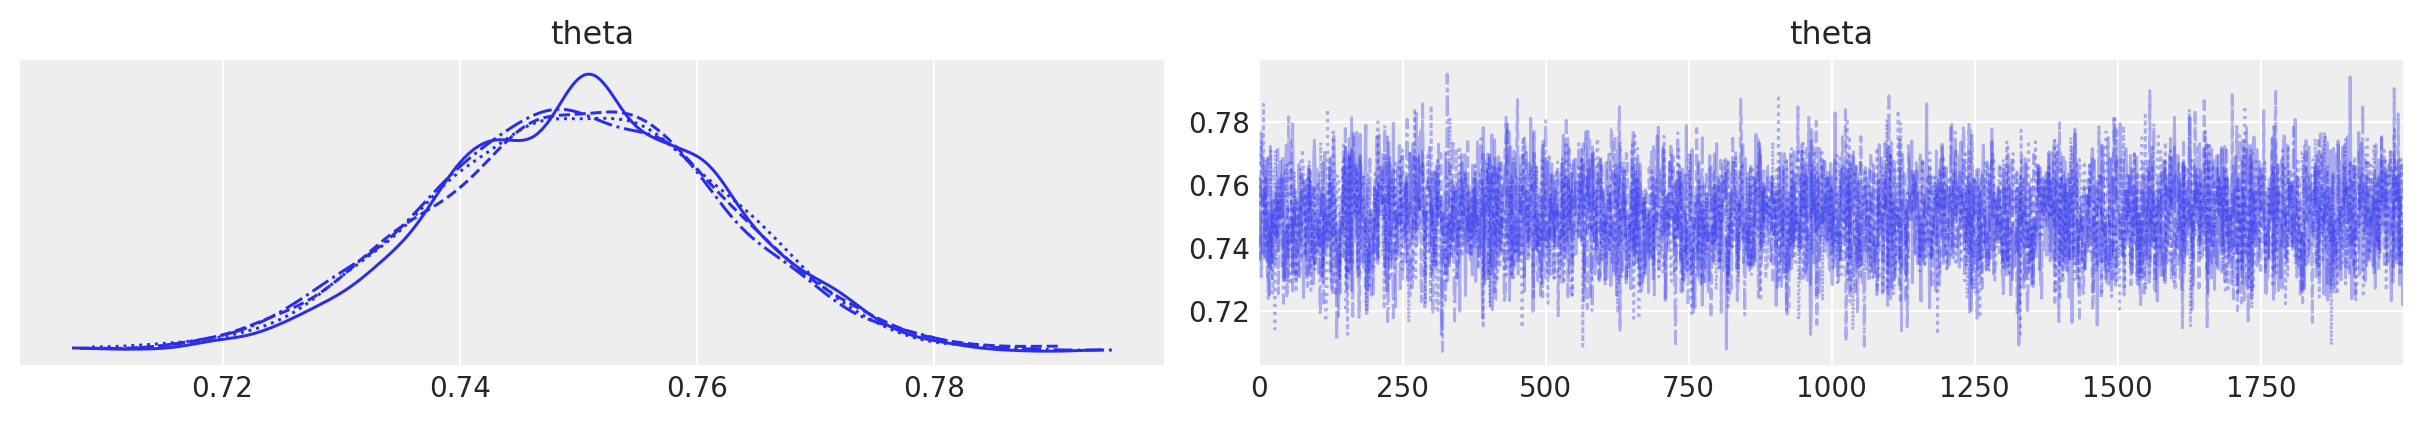

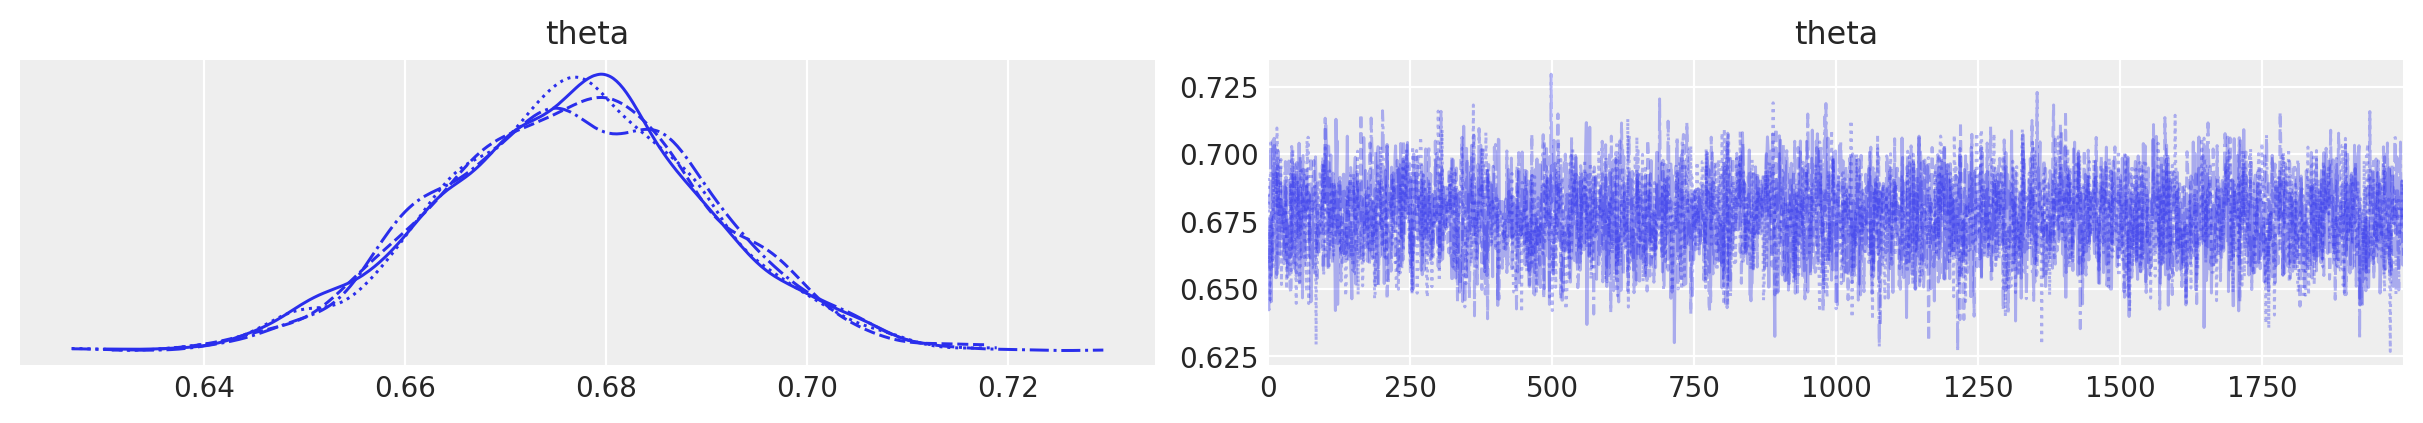

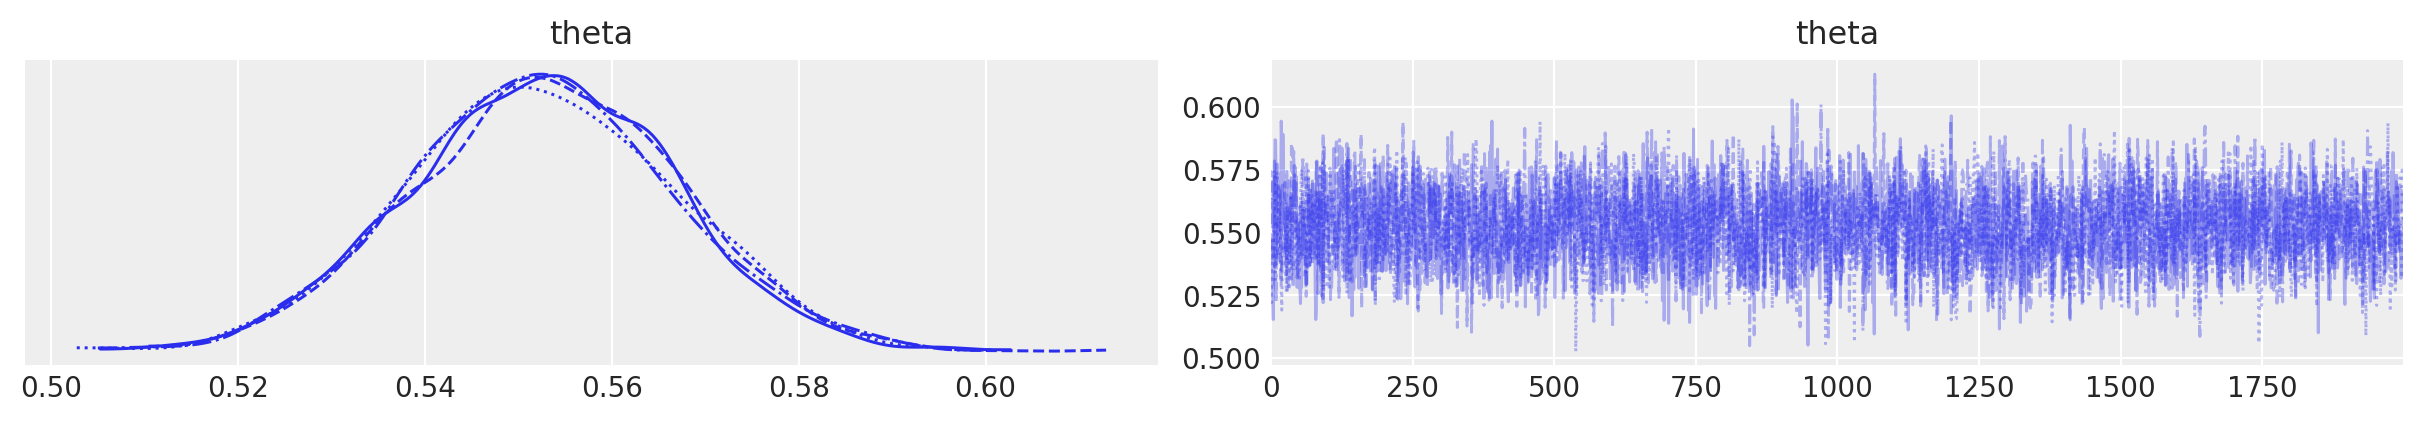

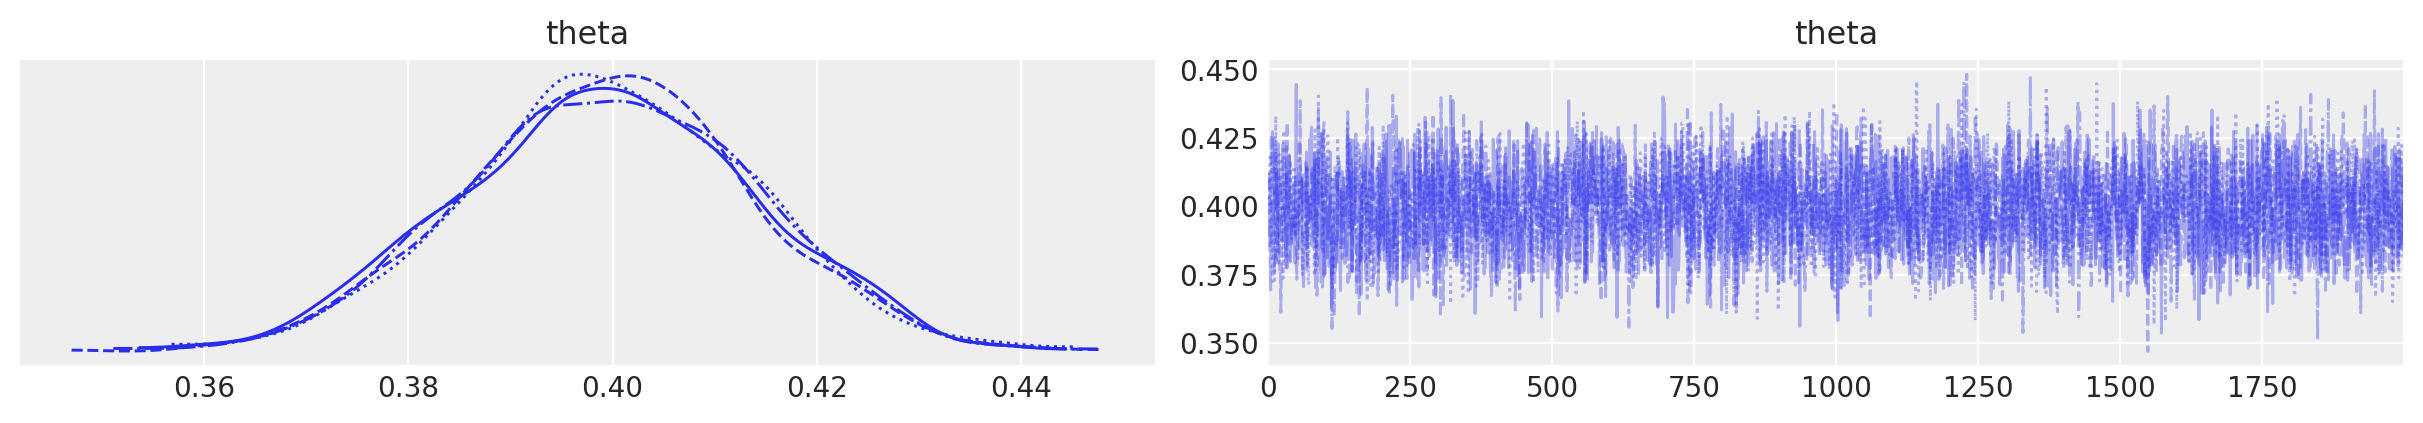

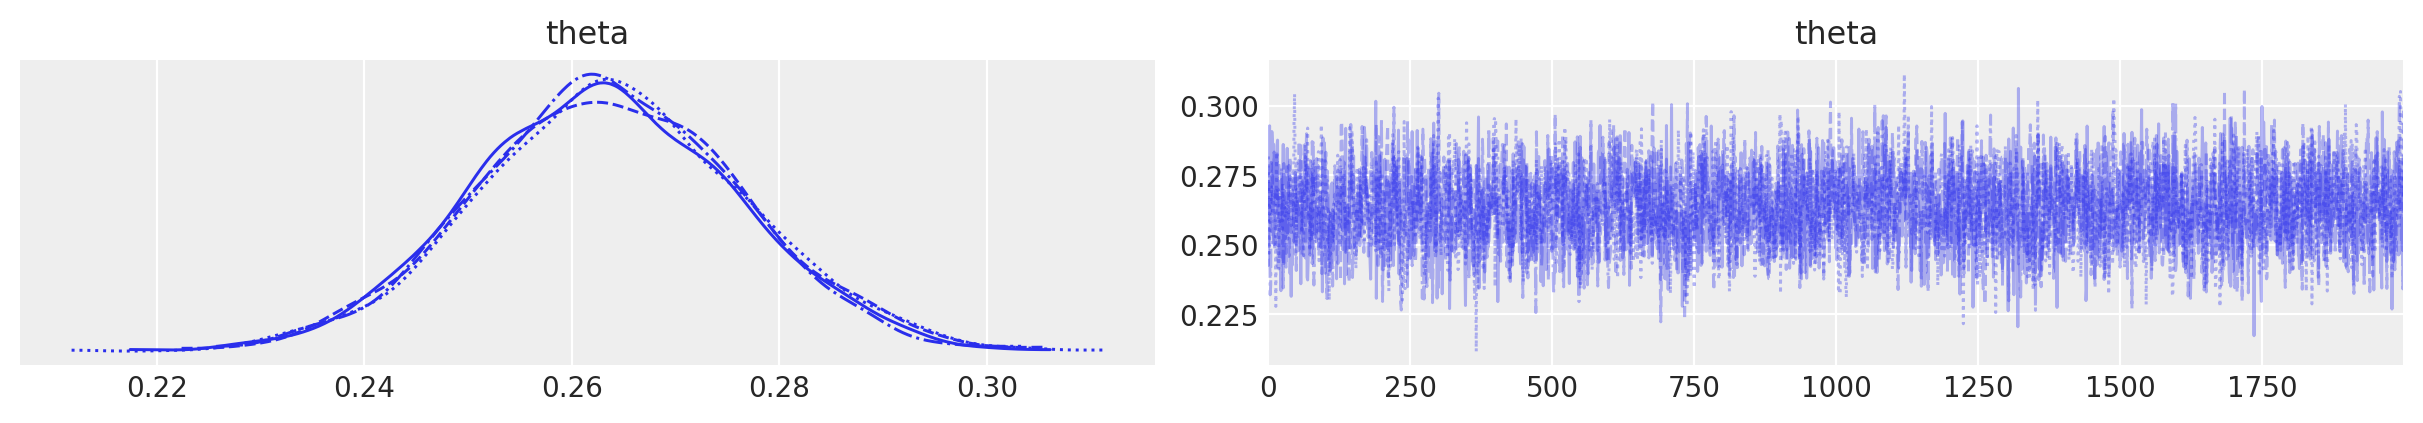

In [47]:
for key, trace in all_traces.items(): 
    az.plot_trace(trace, var_names=["theta"])

5-accuracy
6-accuracy
7-accuracy
8-accuracy
9-accuracy


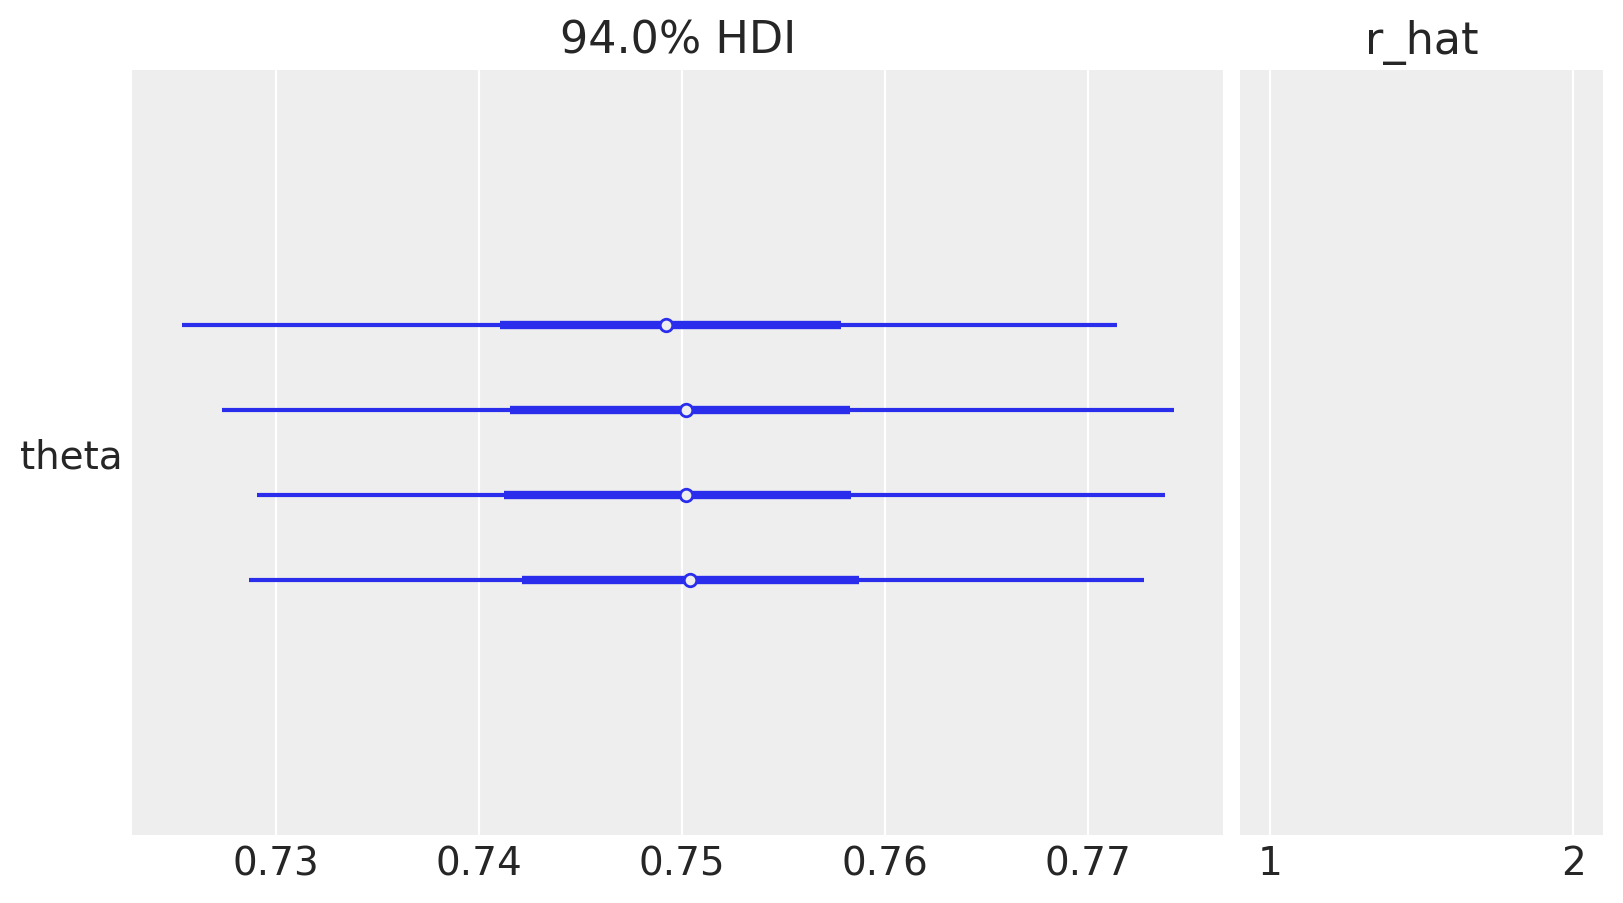

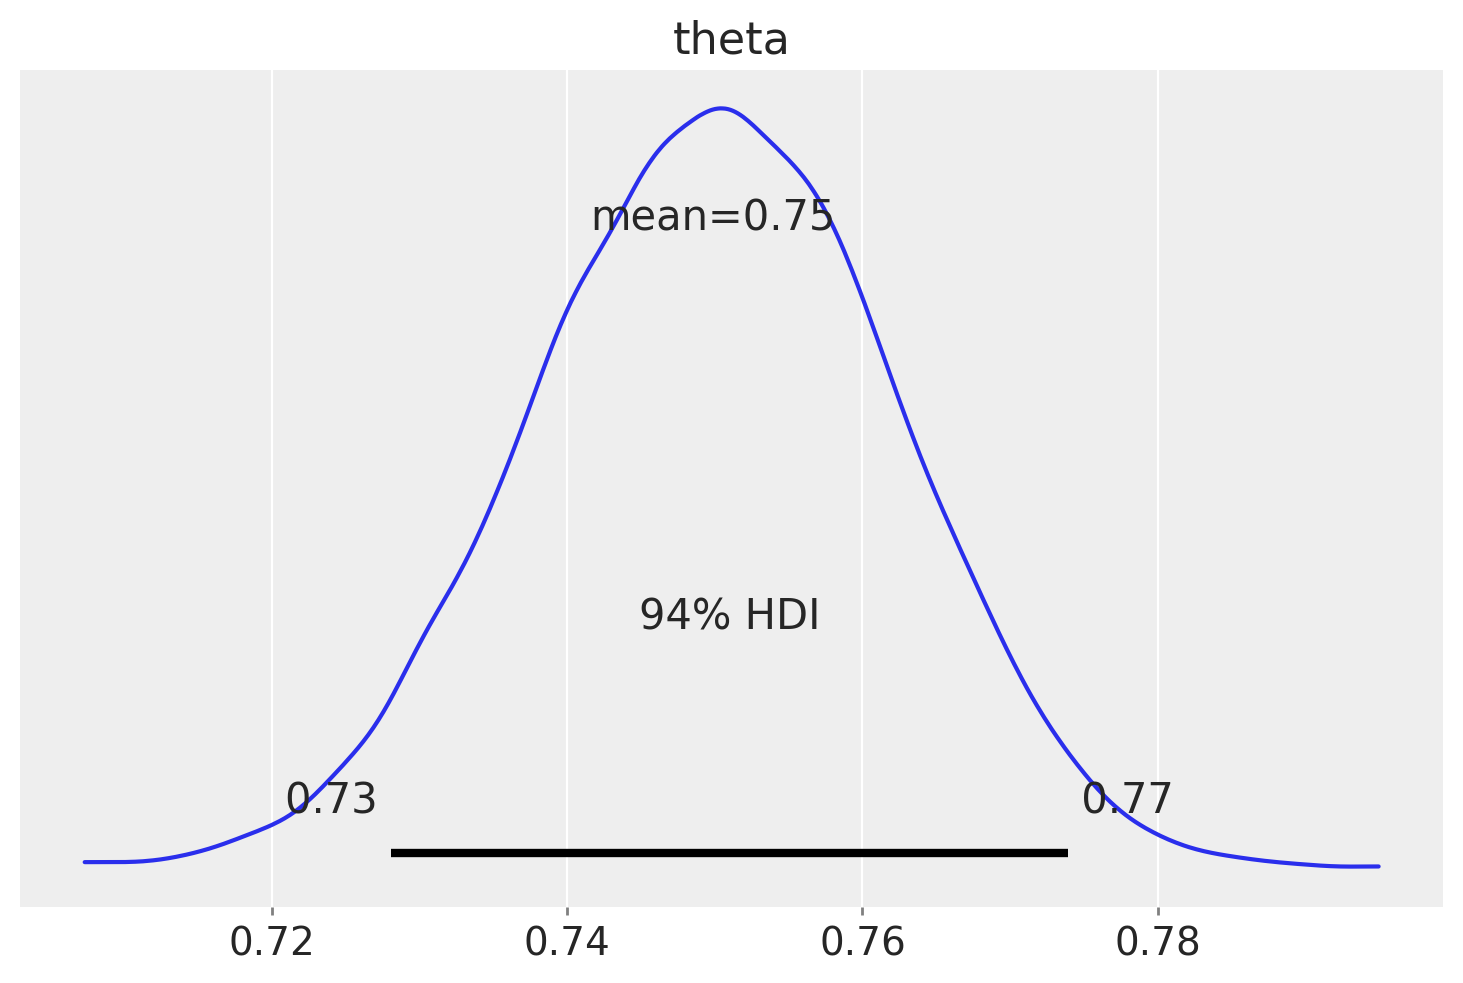

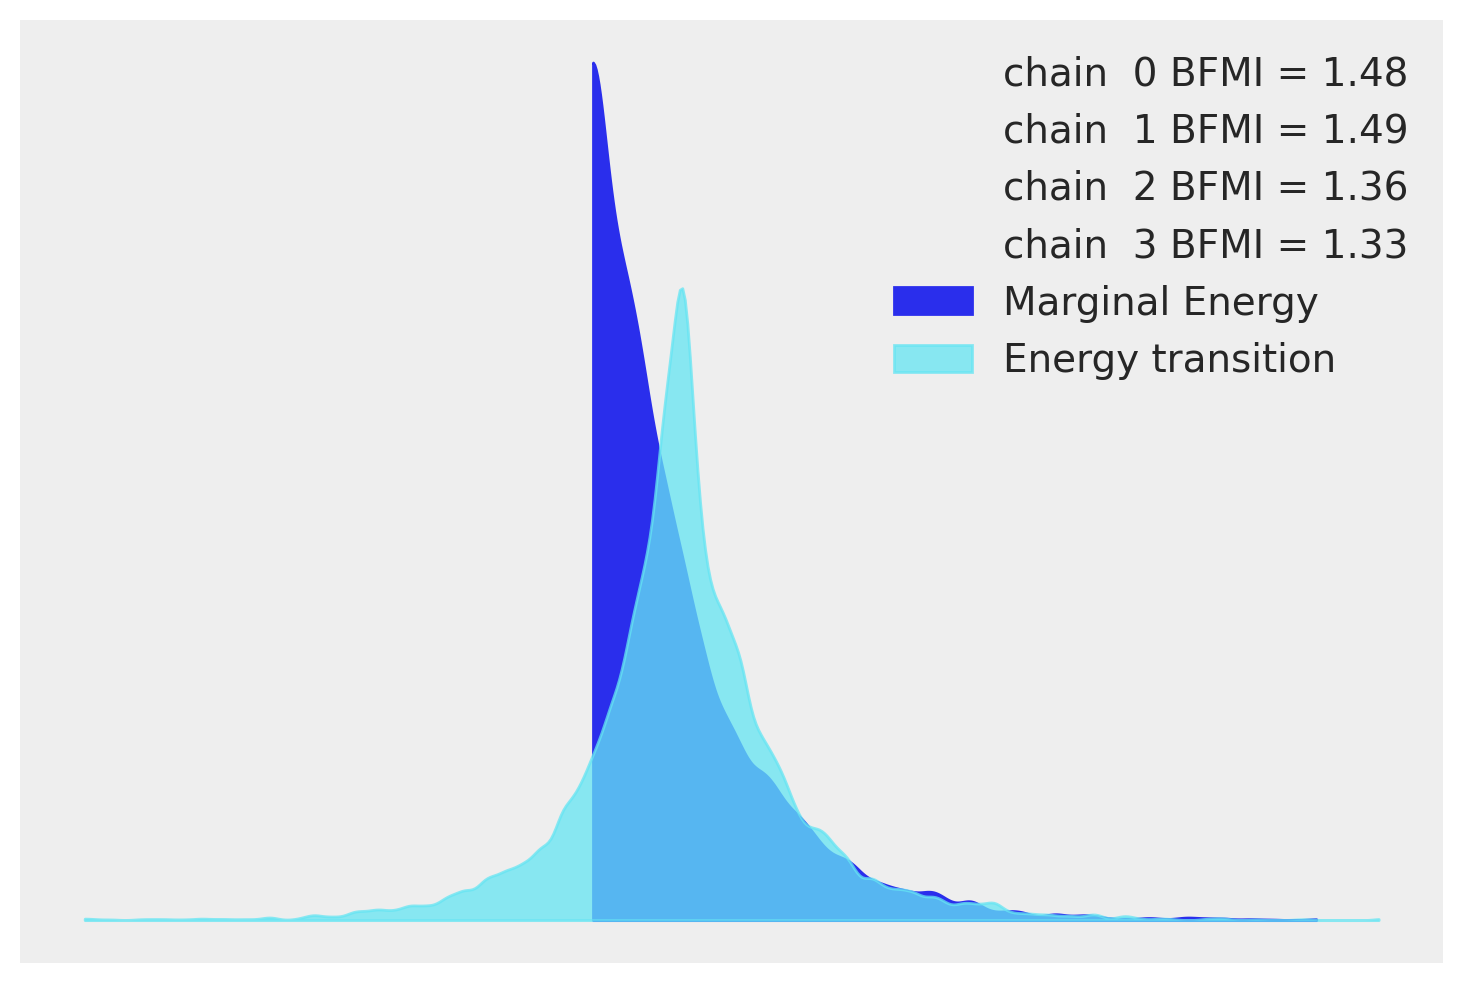

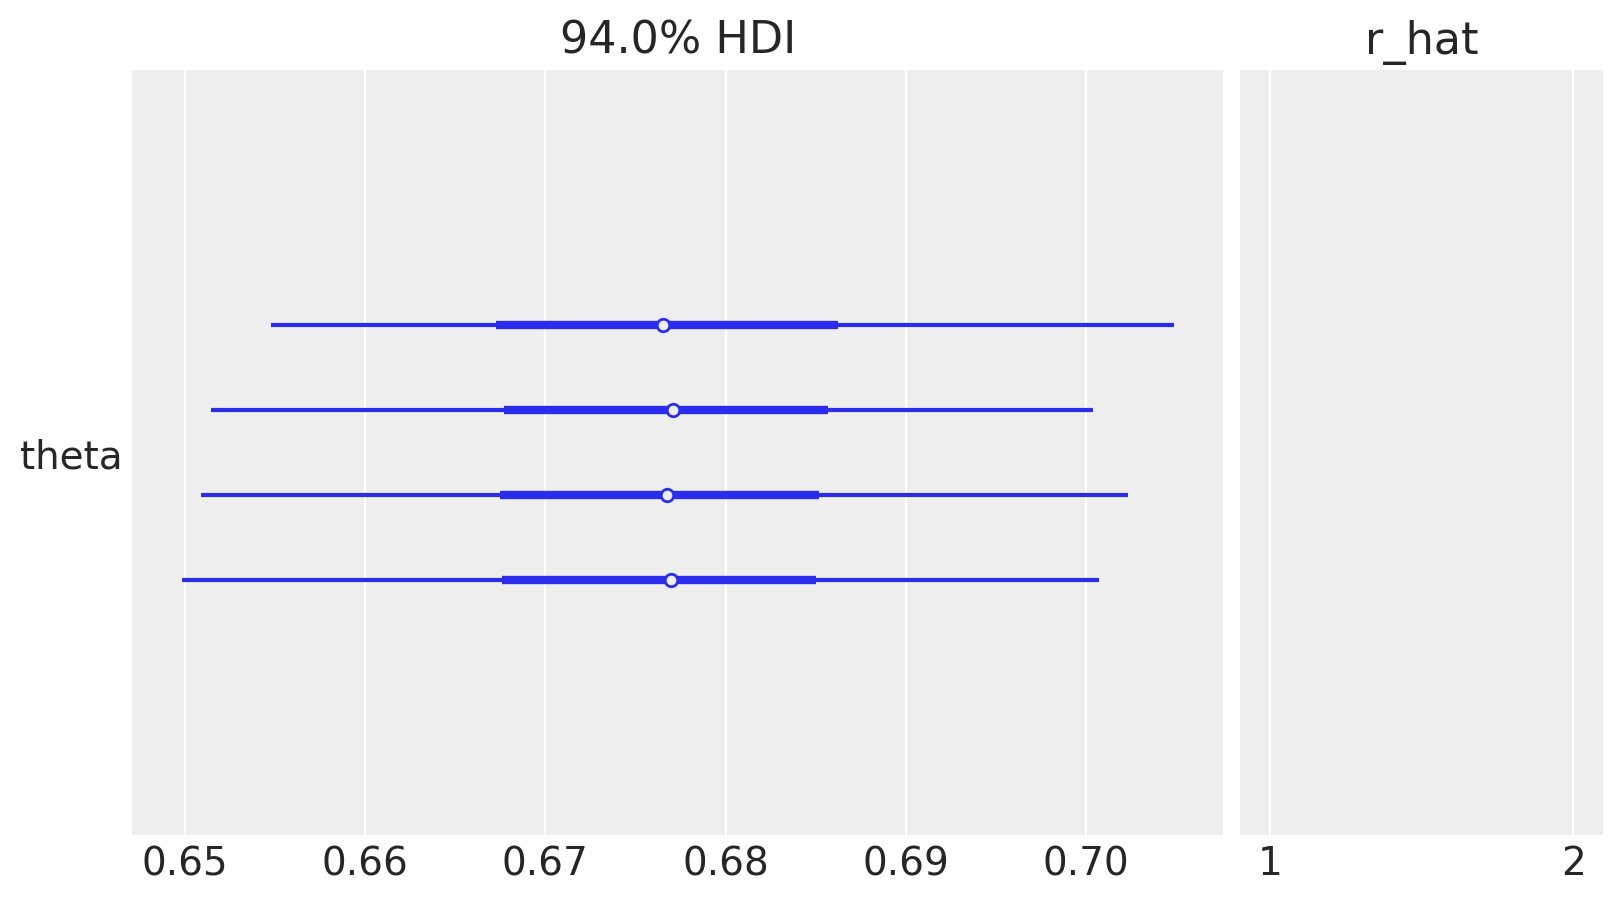

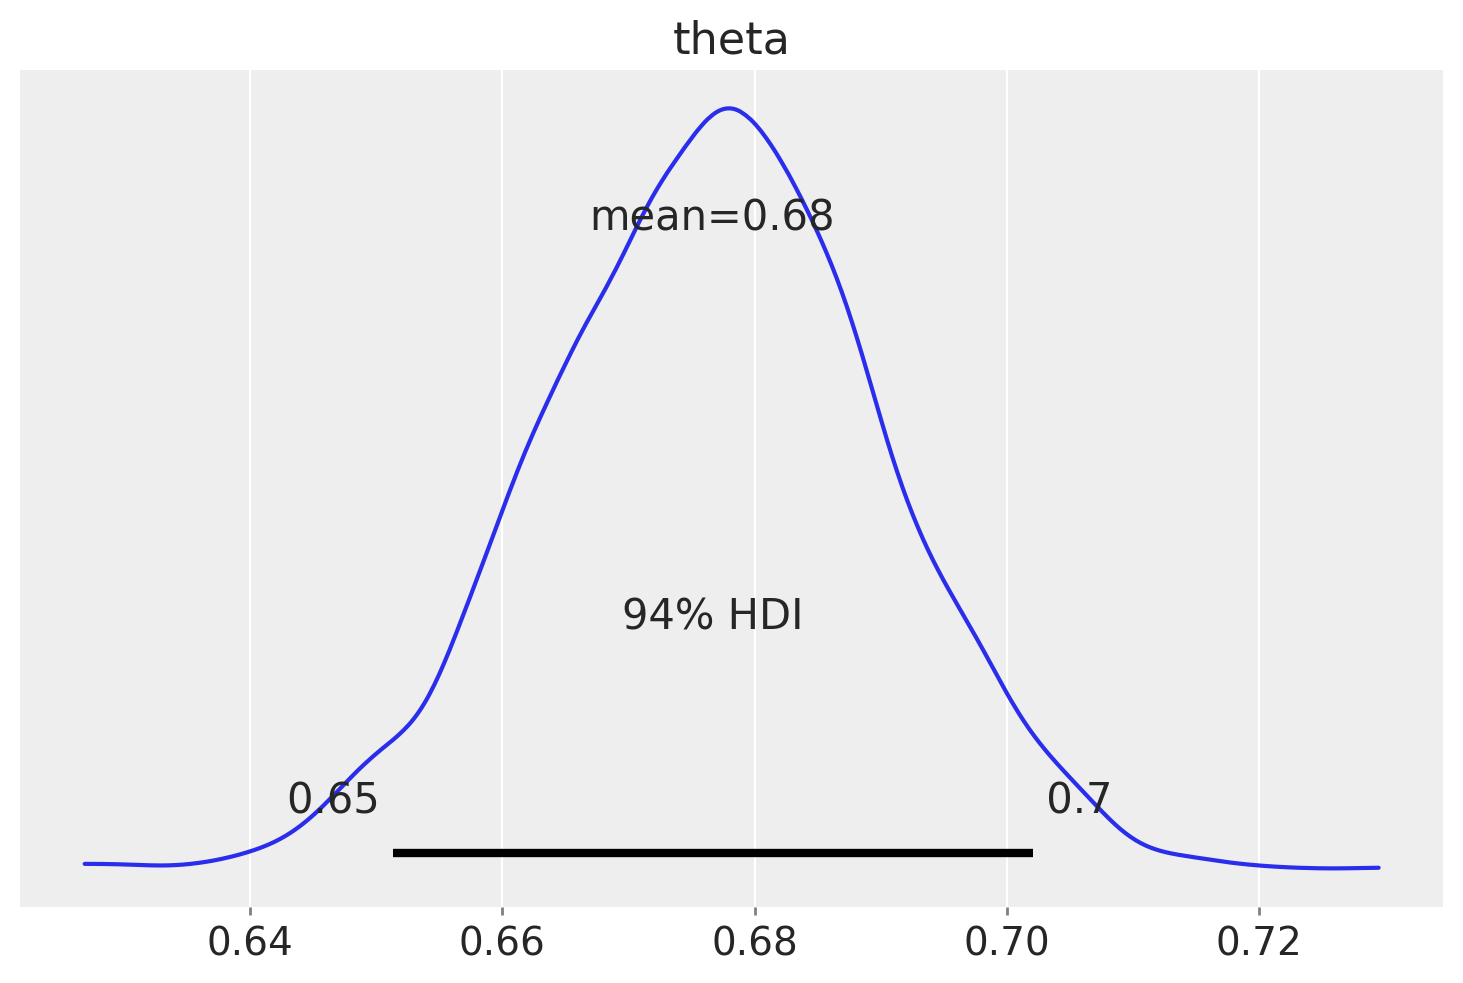

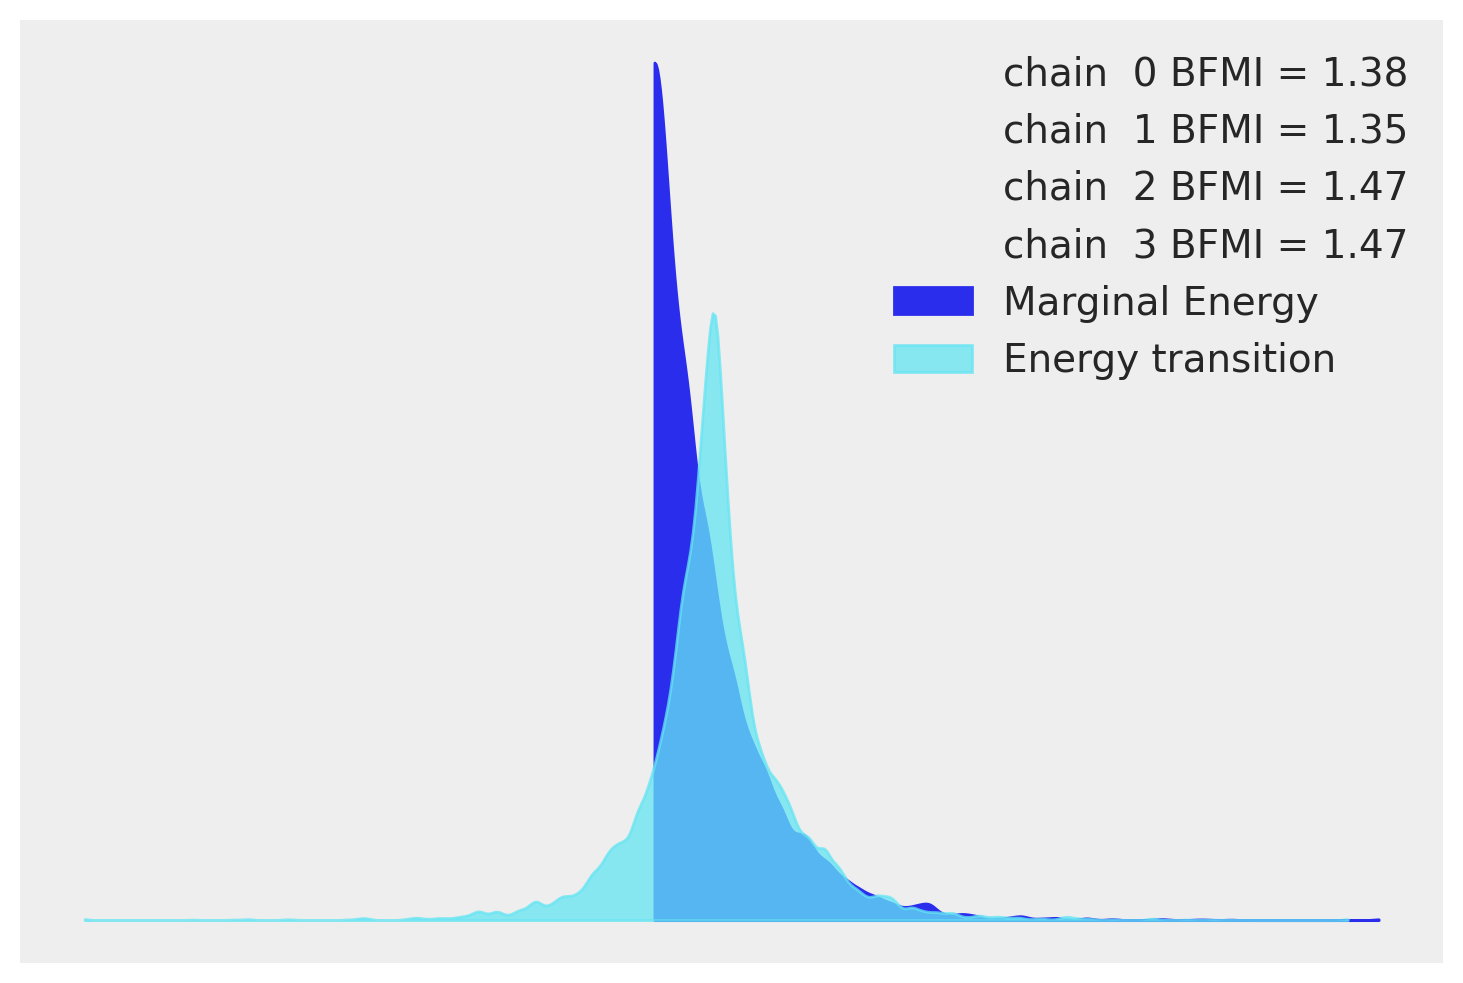

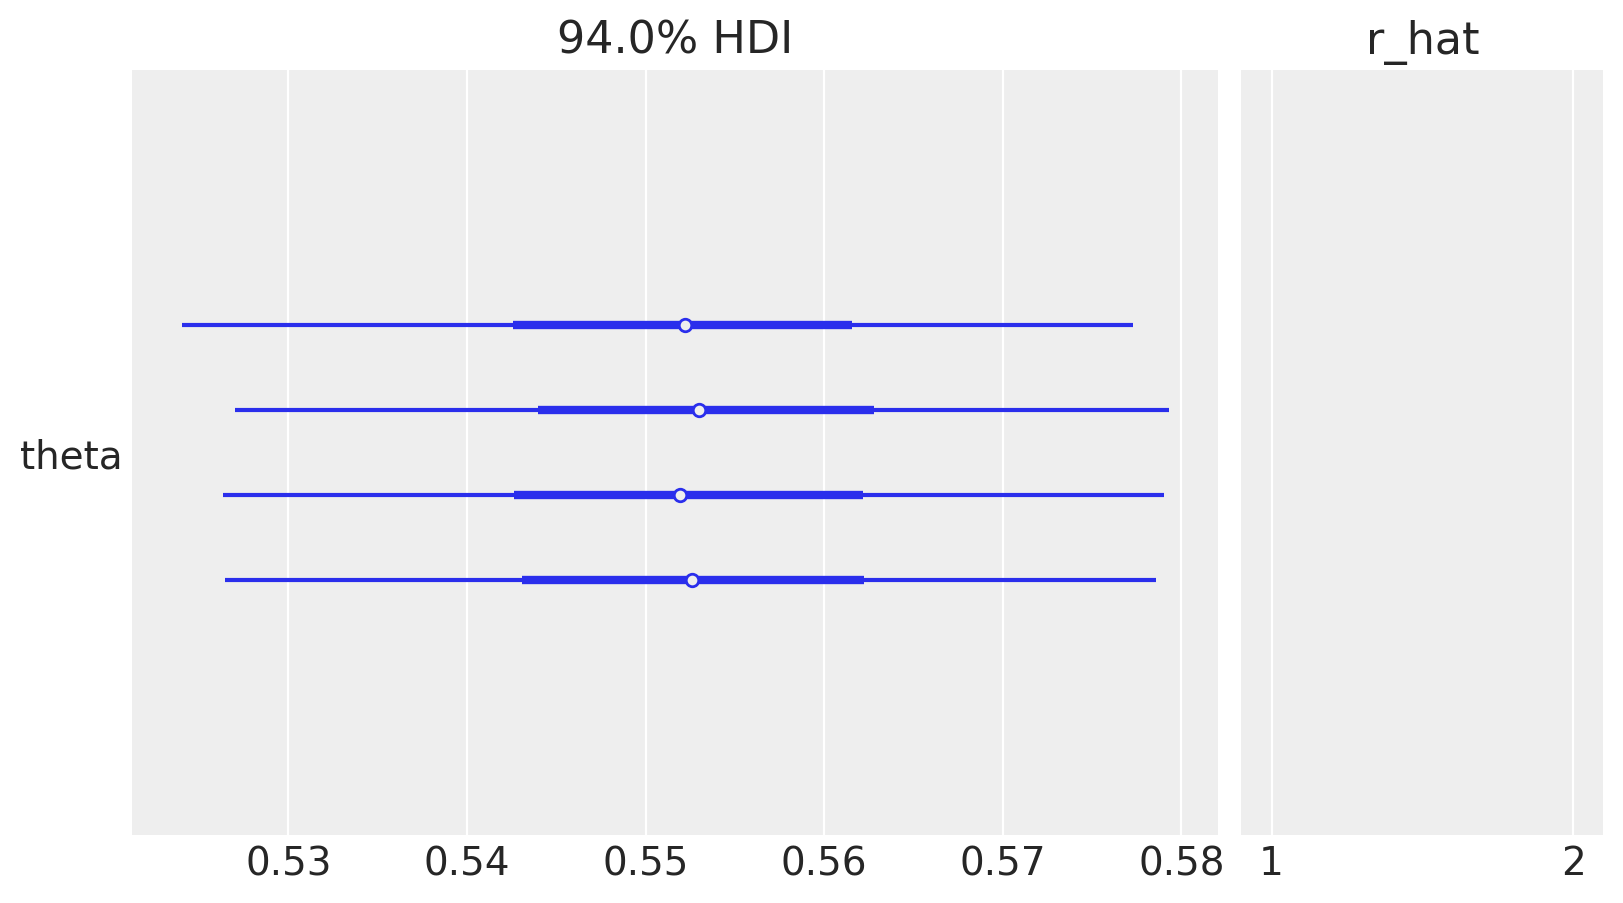

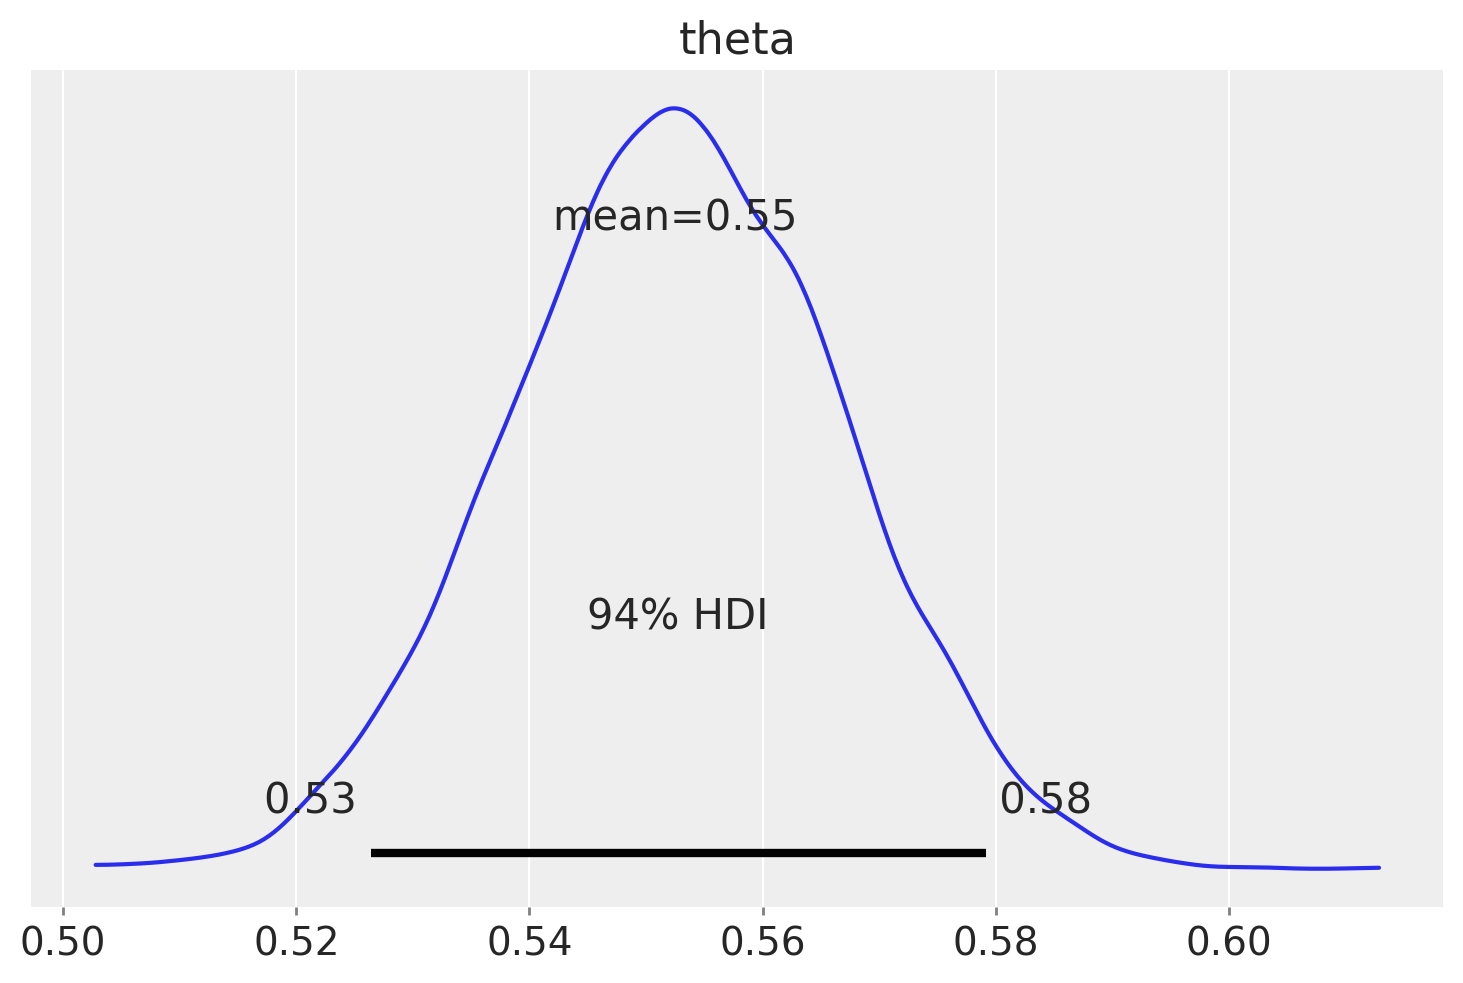

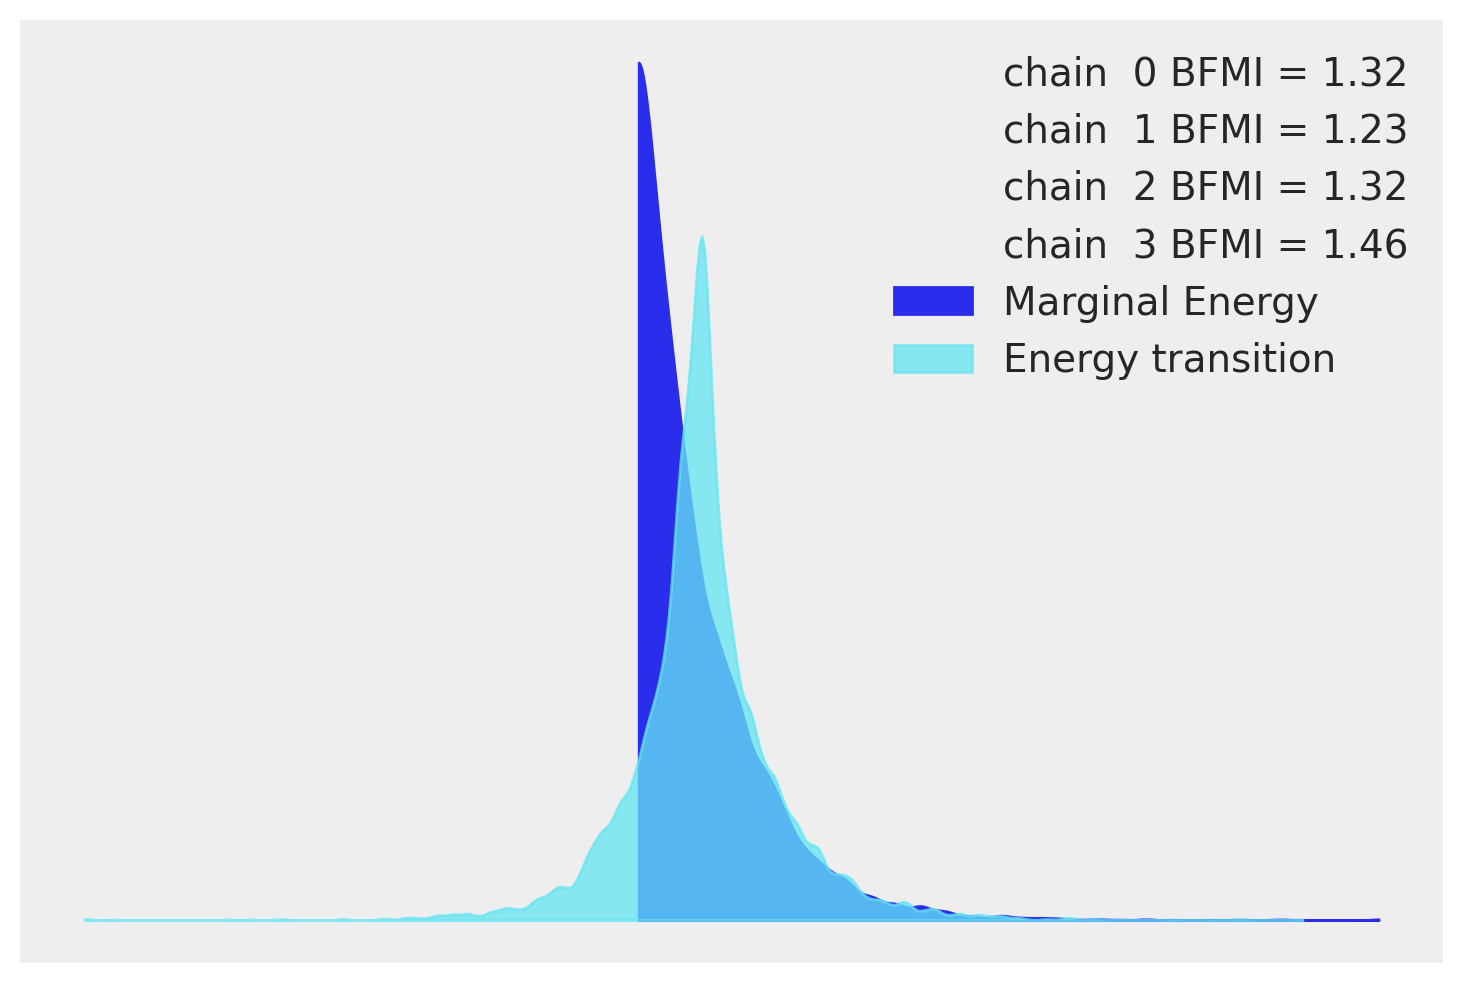

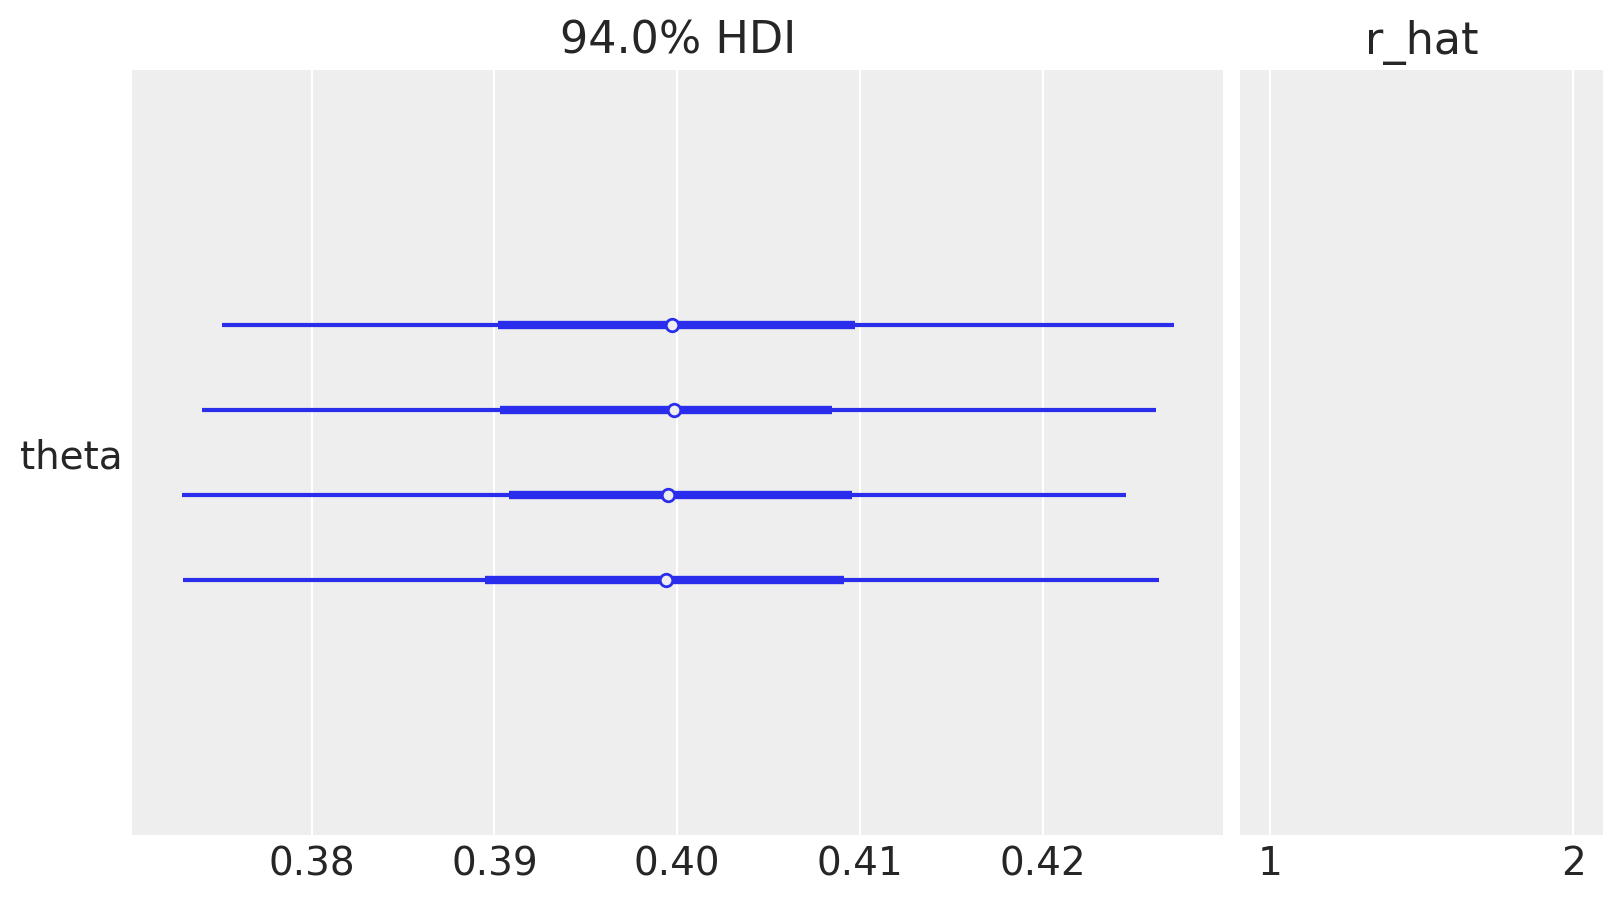

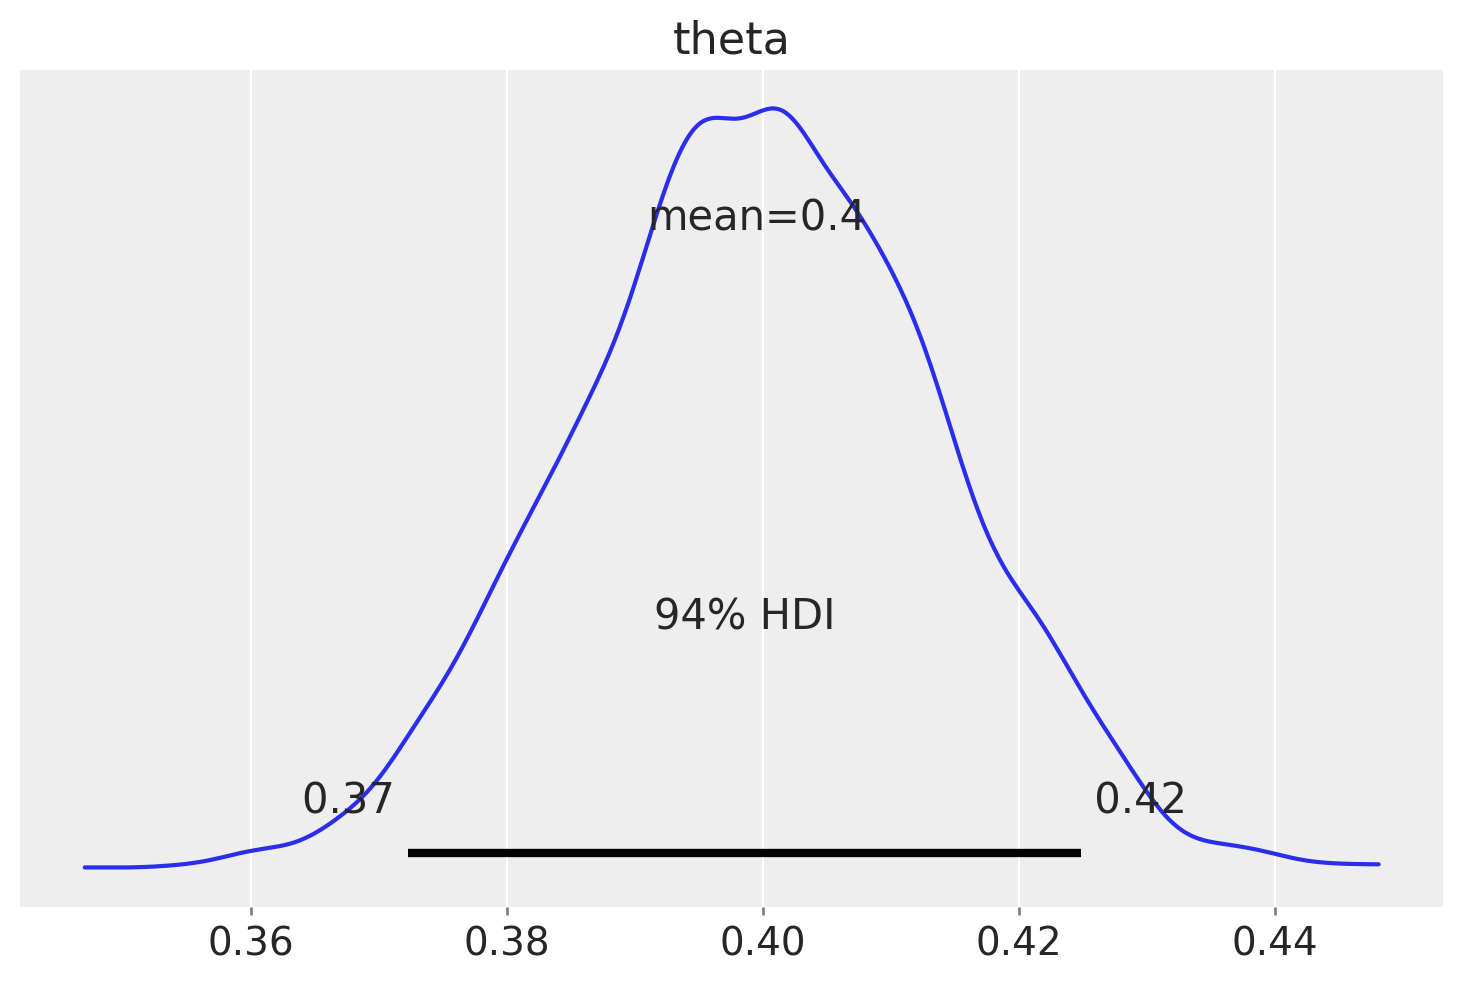

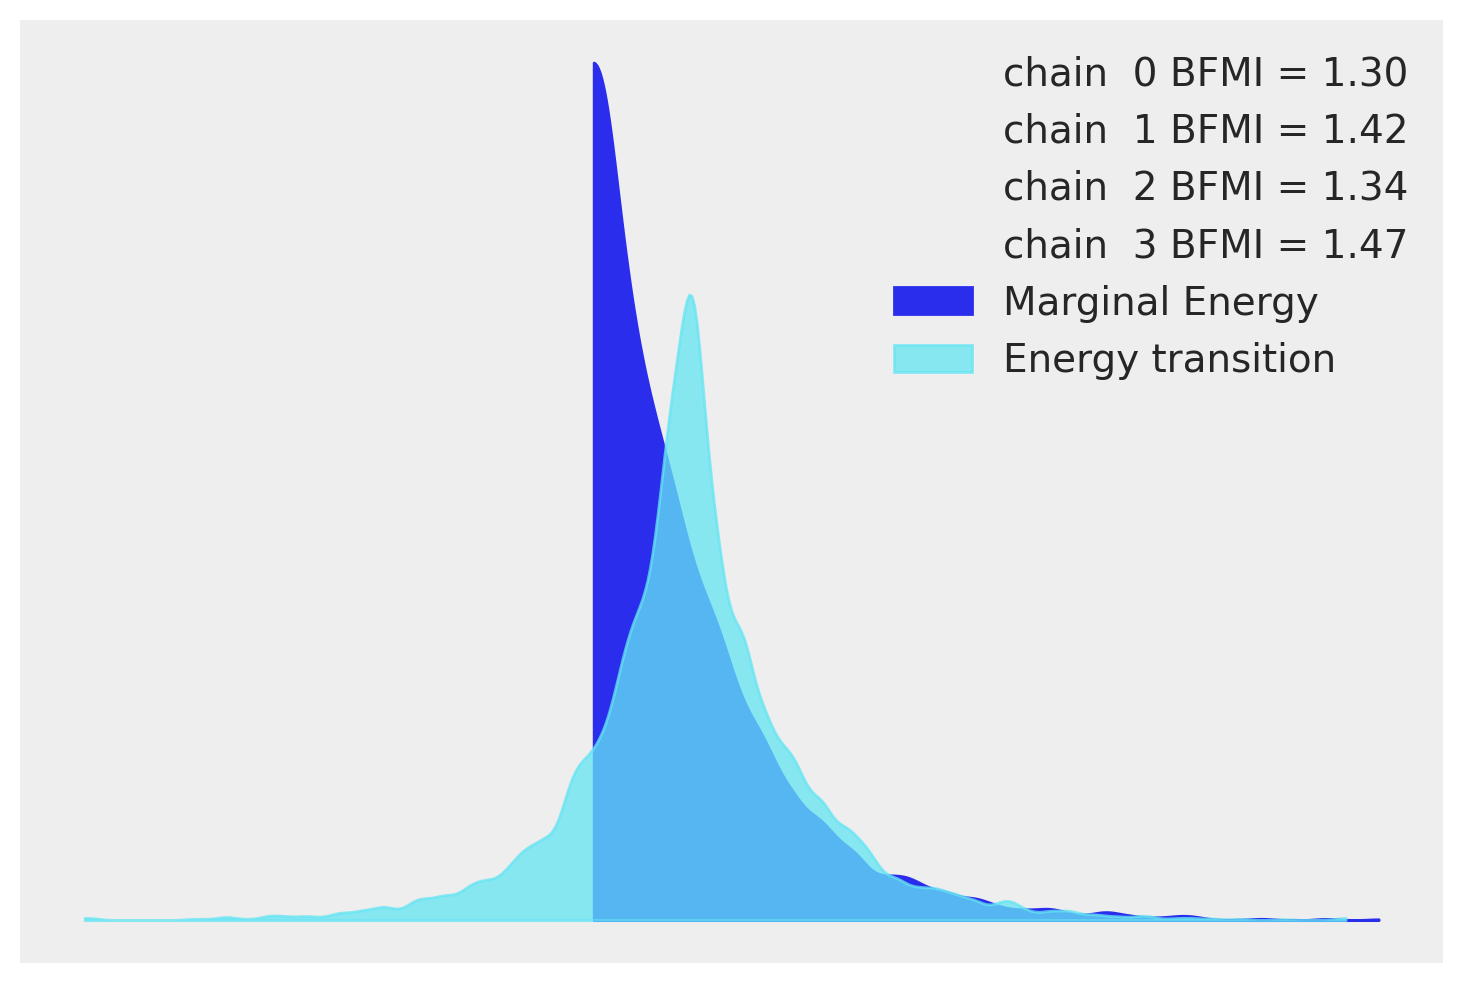

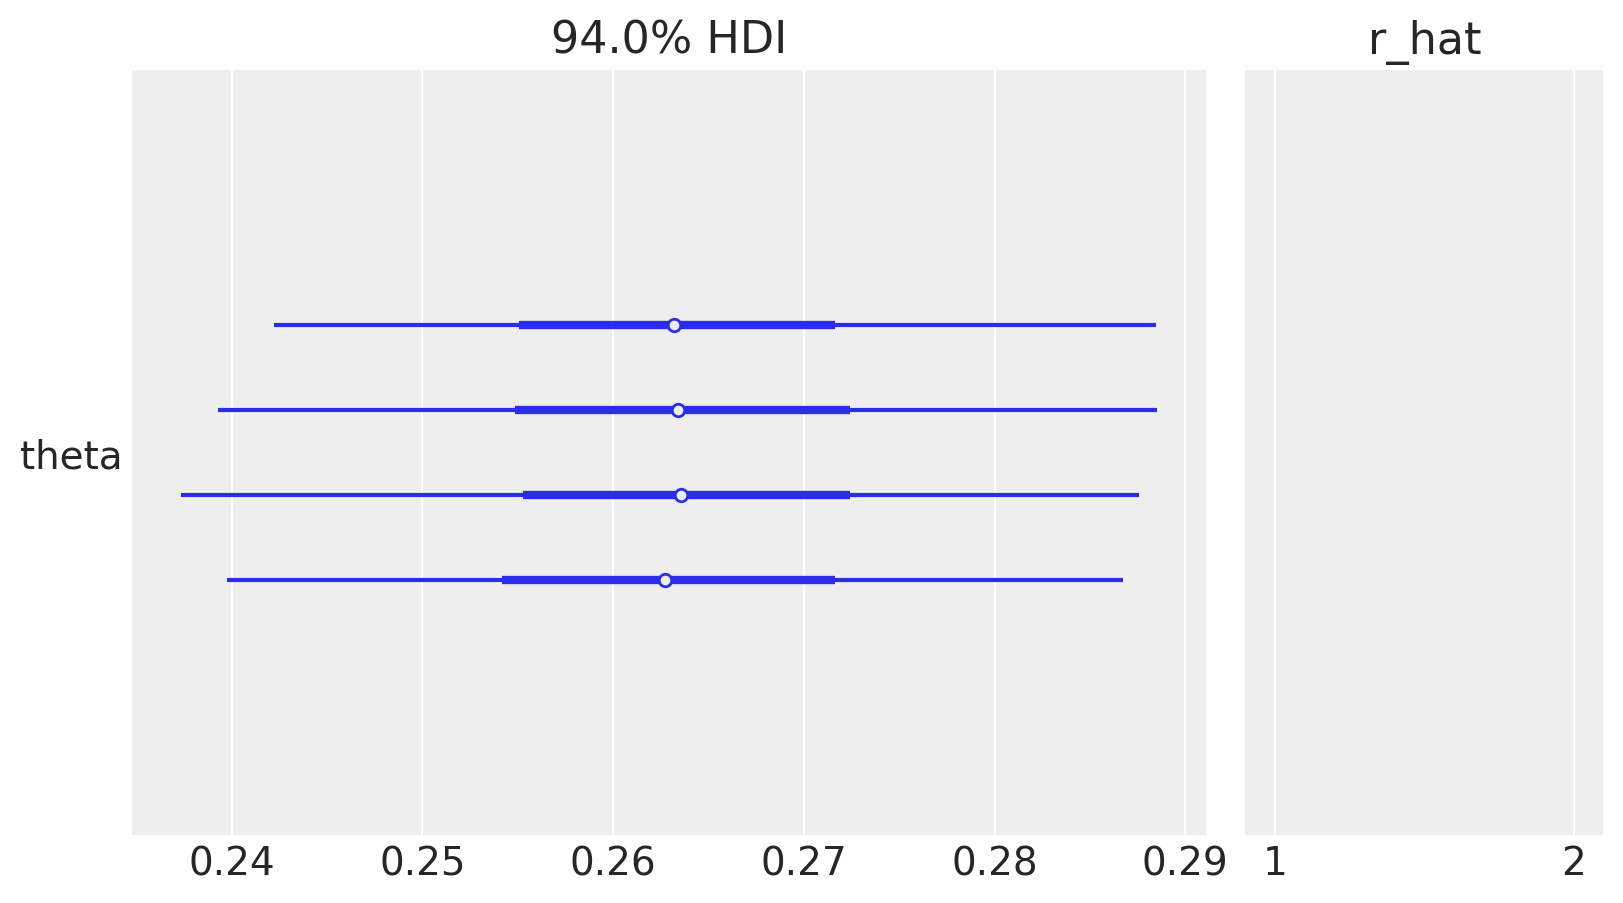

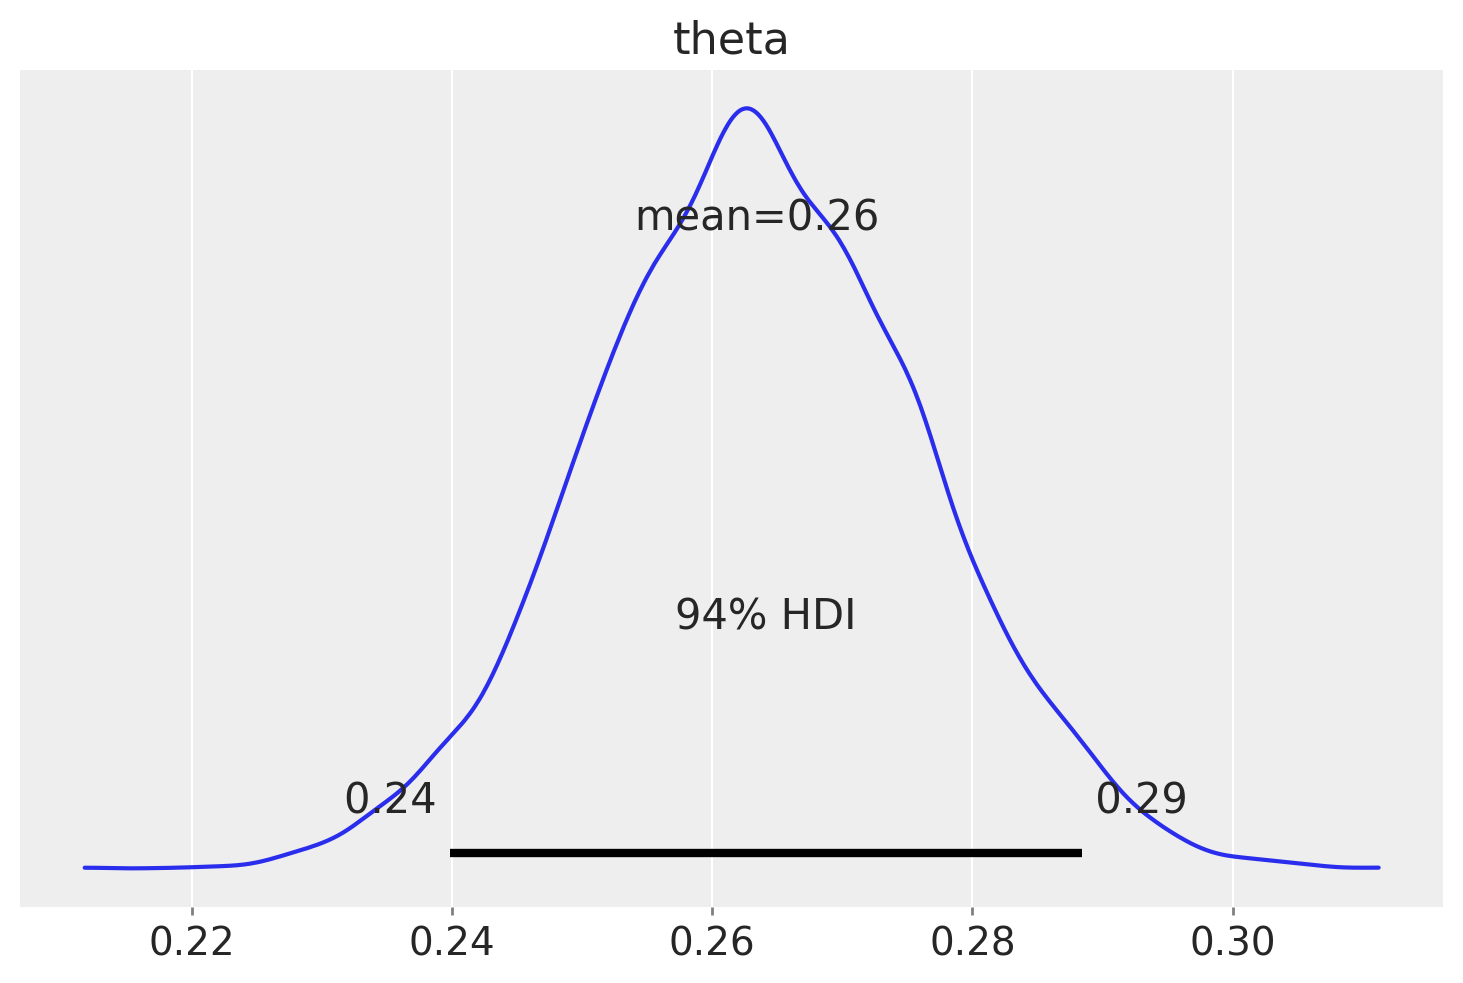

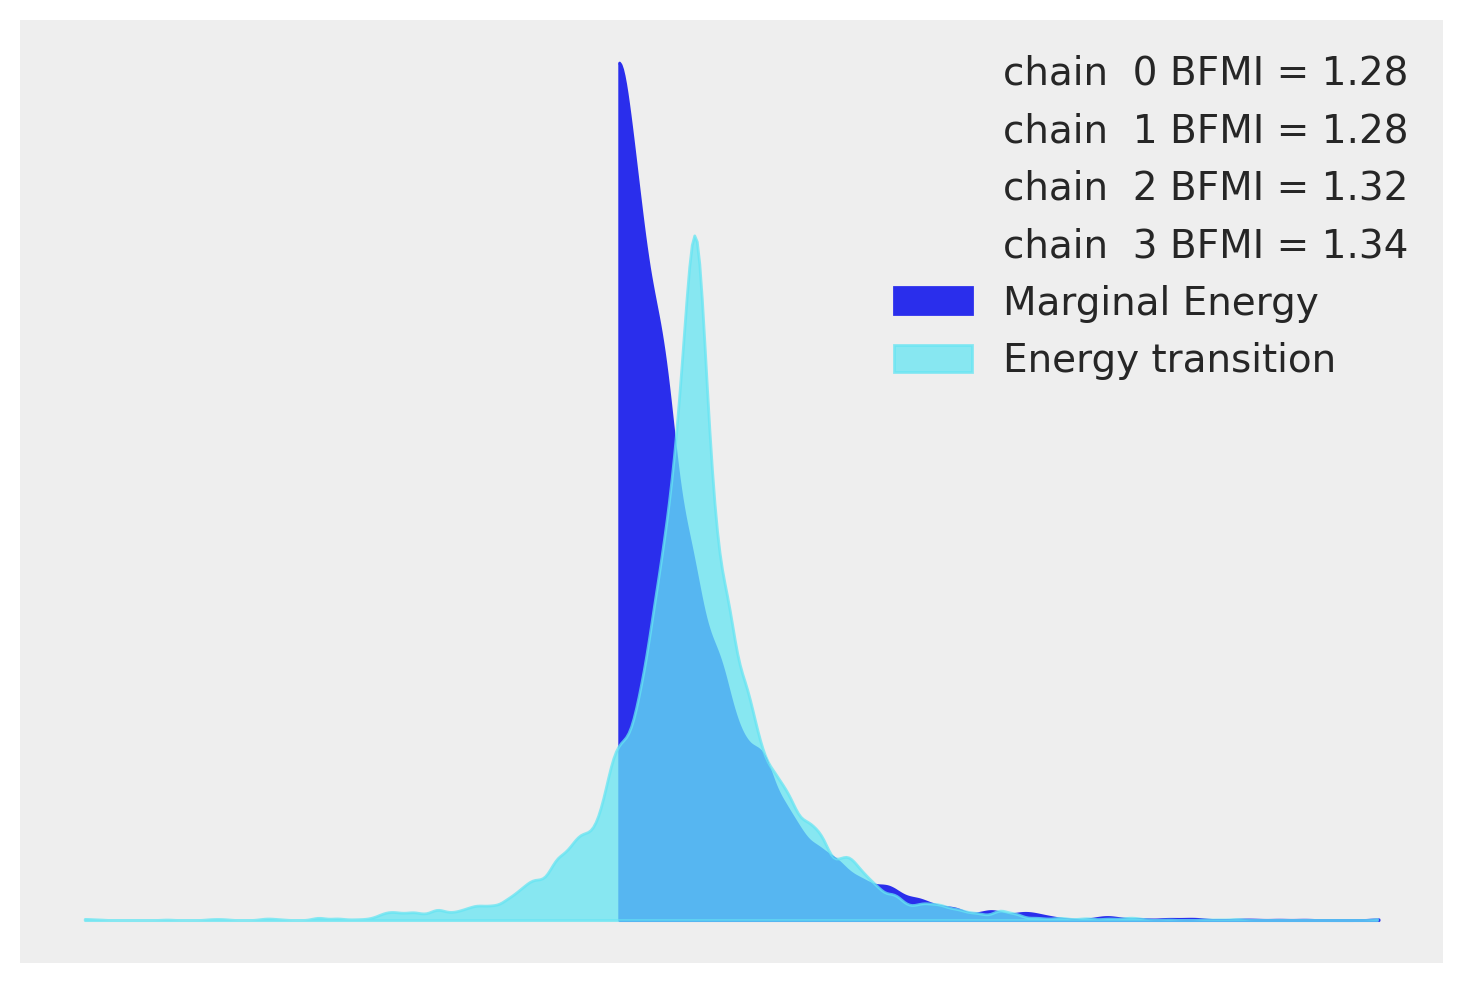

In [57]:
for key, trace in all_traces.items(): 
    az.plot_forest(trace, r_hat=True);
    az.plot_posterior(trace)
    az.plot_energy(trace);

In [145]:
def get_unpooled_trace(data, condition):
    with pm.Model() as unpooled_model: 
        # prior on theta: 
        theta = pm.Uniform("theta", lower=0, upper=1, shape=30)
        # likelihood
        binom = pm.Binomial("binomial", p=theta[data.index.values], n=data.total_resp[data.index.values], observed=data[condition])
        unpooled_trace = pm.sample(500)
    return unpooled_model, unpooled_trace

data = df[['5-accuracy', 'total_resp']]
unpooled_model, unpooled_trace = get_unpooled_trace(data, '5-accuracy')

    5-accuracy  total_resp
0           34          40
1           40          40
2           28          40
3           38          40
4           27          40
5           33          40
6           25          40
7           34          40
8           22          40
9            7          40
10          34          40
11          28          40
12          26          40
13          31          40
14          37          40
15          37          40
16          39          40
17          38          40
18          13          40
19          33          40
20          36          40
21          38          40
22          26          40
23          39          40
24          18          40
25          35          40
26          29          40
27          35          40
28          12          40
29          28          40


/var/folders/fm/tjrh21s10mnbs6217l5wp52c0000gn/T/ipykernel_52318/1613378428.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  unpooled_trace = pm.sample(500)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to 

/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/theano/scalar/basic.py:1955: RuntimeWarning: divide by zero encountered in true_divide
  return x / y
/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/theano/scalar/basic.py:1955: RuntimeWarning: invalid value encountered in true_divide
  return x / y
/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/theano/scalar/basic.py:1955: RuntimeWarning: invalid value encountered in true_divide
  return x / y
Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 133 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a mod

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
theta[0]   0.834  0.055   0.729    0.928      0.001    0.001    3572.0   
theta[1]   0.975  0.026   0.931    1.000      0.001    0.000    3495.0   
theta[2]   0.690  0.068   0.572    0.824      0.001    0.001    5190.0   
theta[3]   0.929  0.038   0.859    0.991      0.001    0.000    3774.0   
theta[4]   0.668  0.073   0.538    0.805      0.001    0.001    5225.0   
theta[5]   0.810  0.059   0.704    0.918      0.001    0.001    4595.0   
theta[6]   0.621  0.073   0.483    0.753      0.001    0.001    4713.0   
theta[7]   0.834  0.056   0.727    0.928      0.001    0.001    3419.0   
theta[8]   0.549  0.075   0.402    0.683      0.001    0.001    3953.0   
theta[9]   0.190  0.057   0.093    0.302      0.001    0.001    4310.0   
theta[10]  0.833  0.055   0.727    0.932      0.001    0.001    5261.0   
theta[11]  0.690  0.069   0.551    0.810      0.001    0.001    4189.0   
theta[12]  0.643  0.076   0.508    0.787      0.001    0.001    5316.0   
theta[13]  0.762  0.064   0.638    0.877      0.001    0.001    4049.0   
theta[14]  0.905  0.045   0.824    0.982      0.001    0.001    3808.0   
theta[15]  0.904  0.046   0.815    0.979      0.001    0.001    3884.0   
theta[16]  0.953  0.031   0.895    0.998      0.001    0.000    3667.0   
theta[17]  0.928  0.039   0.857    0.990      0.001    0.000    4431.0   
theta[18]  0.333  0.072   0.199    0.462      0.001    0.001    4643.0   
theta[19]  0.809  0.063   0.691    0.915      0.001    0.001    4642.0   
theta[20]  0.882  0.046   0.802    0.962      0.001    0.001    4333.0   
theta[21]  0.929  0.038   0.858    0.987      0.001    0.000    4830.0   
theta[22]  0.642  0.074   0.497    0.768      0.001    0.001    4552.0   
theta[23]  0.953  0.032   0.892    0.998      0.000    0.000    4149.0   
theta[24]  0.454  0.075   0.317    0.604      0.001    0.001    4653.0   
theta[25]  0.858  0.054   0.761    0.951      0.001    0.001    3750.0   
theta[26]  0.712  0.071   0.589    0.843      0.001    0.001    3734.0   
theta[27]  0.858  0.053   0.764    0.952      0.001    0.001    4617.0   
theta[28]  0.309  0.070   0.183    0.440      0.001    0.001    4368.0   
theta[29]  0.690  0.072   0.553    0.819      0.001    0.001    4366.0   

           ess_tail  r_hat  
theta[0]     1392.0   1.01  
theta[1]     1449.0   1.00  
theta[2]     1371.0   1.00  
theta[3]     1458.0   1.00  
theta[4]     1523.0   1.00  
theta[5]     1295.0   1.00  
theta[6]     1535.0   1.00  
theta[7]     1558.0   1.00  
theta[8]     1110.0   1.01  
theta[9]     1669.0   1.00  
theta[10]    1161.0   1.00  
theta[11]    1455.0   1.00  
theta[12]    1412.0   1.01  
theta[13]    1498.0   1.00  
theta[14]    1470.0   1.00  
theta[15]    1270.0   1.00  
theta[16]    1414.0   1.00  
theta[17]    1477.0   1.00  
theta[18]    1493.0   1.00  
theta[19]    1412.0   1.00  
theta[20]    1553.0   1.00  
theta[21]    1398.0   1.00  
theta[22]    1407.0   1.00  
theta[23]    1682.0   1.00  
theta[24]    1363.0   1.00  
theta[25]    1533.0   1.00  
theta[26]    1495.0   1.00  
theta[27]    1625.0   1.00  
theta[28]    1813.0   1.00  
theta[29]    1216.0   1.00

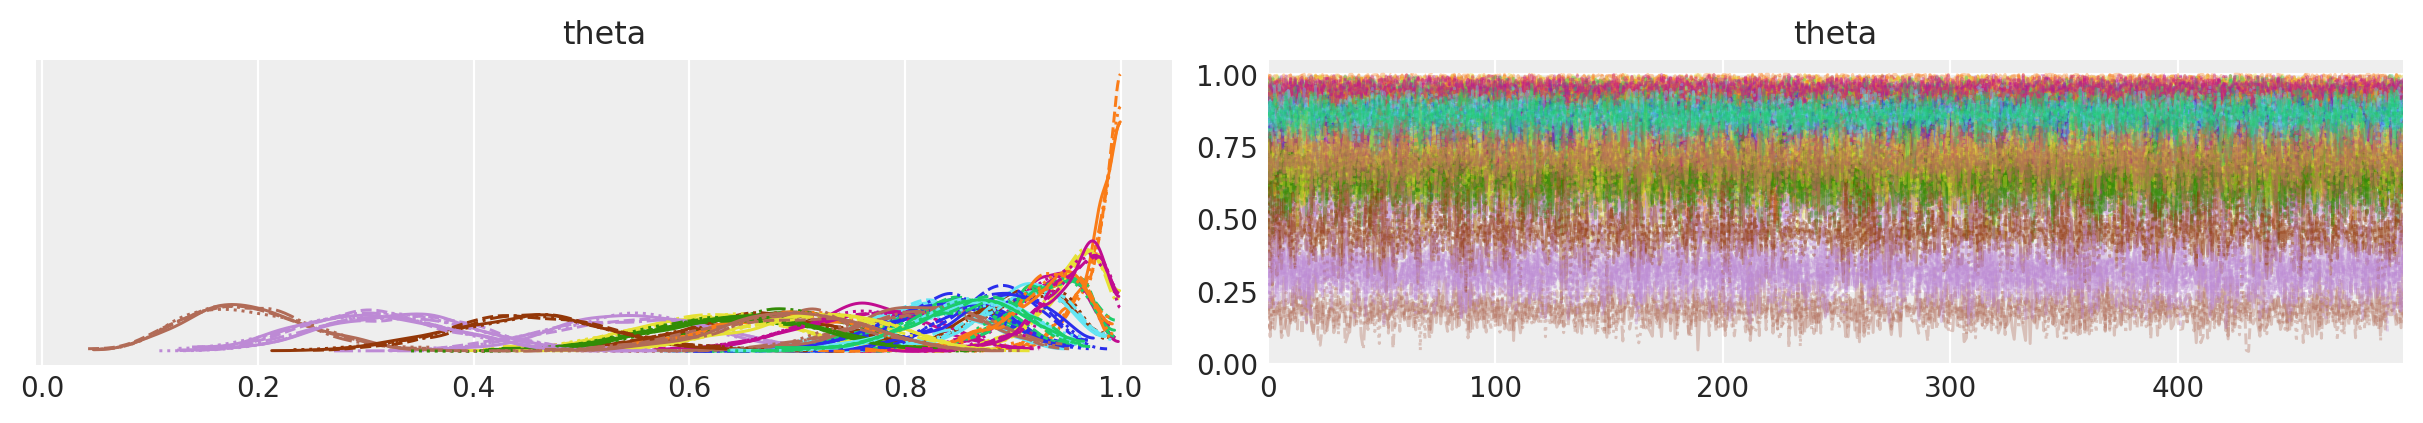

<Figure size 720x480 with 0 Axes>

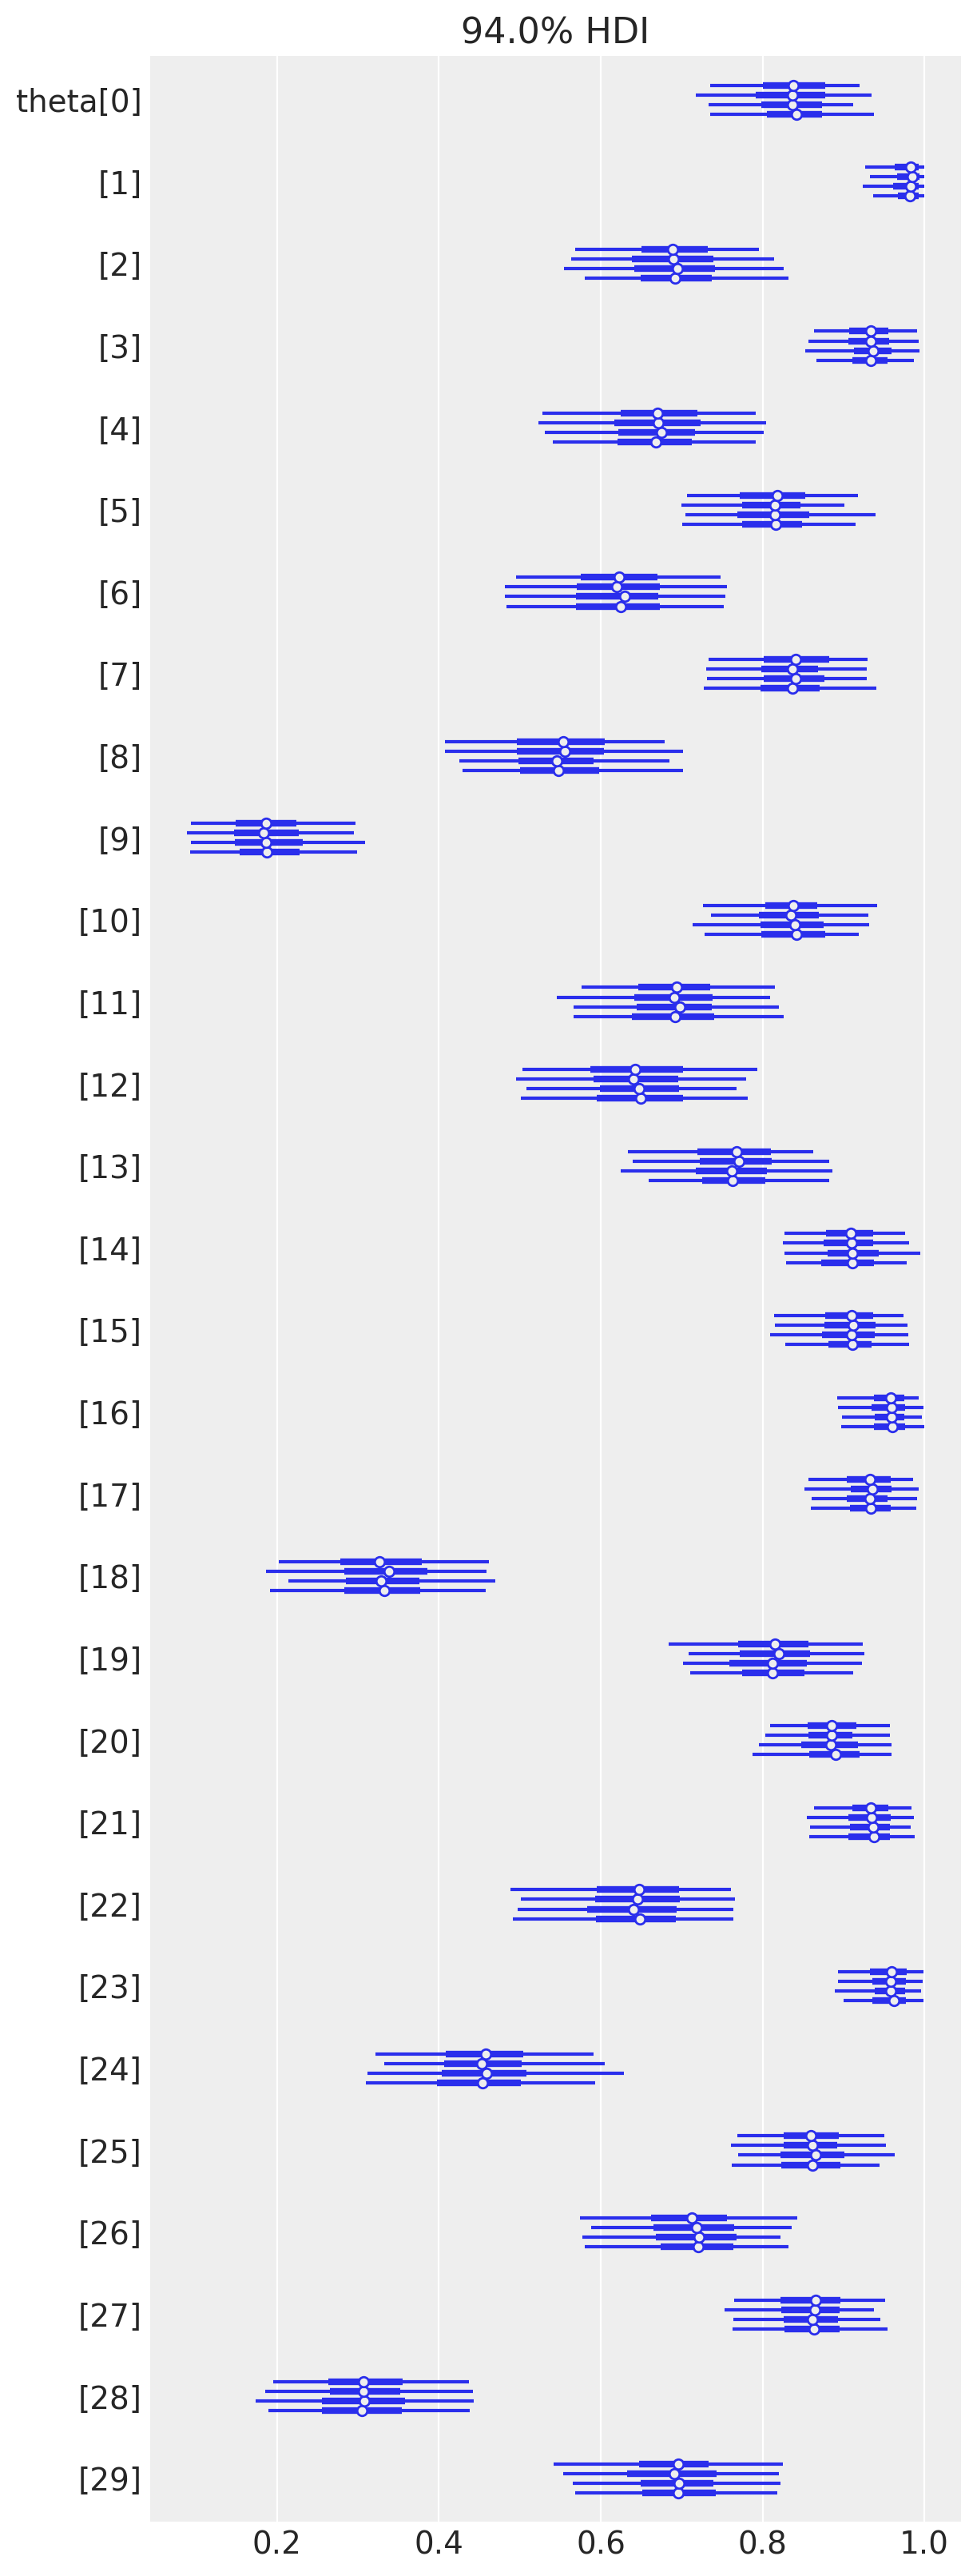

In [148]:
from pymc3 import traceplot, model_to_graphviz
az.plot_trace(unpooled_trace)
plt.figure()
az.plot_forest(unpooled_trace, var_names=['theta'])
az.summary(unpooled_trace)

#model_to_graphviz(unpooled_model)

# Hierarchical model

In [12]:
def get_hierarchical_trace(data, condition):
    with pm.Model() as hierarchical_model: 
        mu_theta_population = pm.Uniform("mu_theta_population",lower=0, upper=1)
        # prior on theta: 
        theta = pm.LogitNormal("theta", mu=mu_theta_population, sigma=0.01, shape=30)
        # likelihood
        binom = pm.Binomial("binomial", p=theta[data.index.values], n=data.total_resp[data.index.values], observed=data[condition])
        unpooled_trace = pm.sample(500)
    return hierarchical_model, unpooled_trace
data = df[['5-accuracy', 'total_resp']]
unpooled_model, unpooled_trace = get_hierarchical_trace(data, '5-accuracy')

/var/folders/fm/tjrh21s10mnbs6217l5wp52c0000gn/T/ipykernel_54727/3174859786.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  unpooled_trace = pm.sample(500)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, mu_theta_population]
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty str

/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/theano/scalar/basic.py:1955: RuntimeWarning: divide by zero encountered in true_divide
  return x / y
/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/theano/scalar/basic.py:3023: RuntimeWarning: divide by zero encountered in log1p
  return np.log1p(x)
/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/theano/scalar/basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/theano/scalar/basic.py:1913: RuntimeWarning: invalid valu

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/adolphemaxime/.local/share/virtualenvs/Results_analysis-p2E4xjeV/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a mod

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
mu_theta_population  0.990  0.006   0.981    1.000      0.002    0.001   
theta[0]             0.729  0.002   0.725    0.733      0.000    0.000   
theta[1]             0.729  0.002   0.726    0.734      0.000    0.000   
theta[2]             0.729  0.002   0.725    0.733      0.000    0.000   
theta[3]             0.729  0.002   0.726    0.734      0.000    0.000   
theta[4]             0.729  0.003   0.725    0.734      0.001    0.000   
theta[5]             0.729  0.002   0.726    0.733      0.000    0.000   
theta[6]             0.729  0.002   0.725    0.733      0.001    0.000   
theta[7]             0.729  0.002   0.726    0.733      0.000    0.000   
theta[8]             0.729  0.002   0.725    0.733      0.000    0.000   
theta[9]             0.729  0.002   0.724    0.733      0.001    0.000   
theta[10]            0.729  0.002   0.725    0.734      0.001    0.000   
theta[11]            0.729  0.002   0.725    0.733      0.000    0.000   
theta[12]            0.729  0.002   0.724    0.733      0.000    0.000   
theta[13]            0.729  0.003   0.724    0.733      0.001    0.000   
theta[14]            0.730  0.002   0.726    0.734      0.000    0.000   
theta[15]            0.730  0.002   0.727    0.734      0.000    0.000   
theta[16]            0.730  0.002   0.726    0.733      0.000    0.000   
theta[17]            0.729  0.002   0.724    0.733      0.001    0.000   
theta[18]            0.729  0.002   0.725    0.733      0.000    0.000   
theta[19]            0.729  0.002   0.725    0.734      0.000    0.000   
theta[20]            0.730  0.002   0.725    0.733      0.000    0.000   
theta[21]            0.729  0.002   0.726    0.733      0.001    0.000   
theta[22]            0.729  0.002   0.725    0.733      0.000    0.000   
theta[23]            0.729  0.002   0.724    0.733      0.001    0.000   
theta[24]            0.729  0.002   0.725    0.733      0.000    0.000   
theta[25]            0.730  0.002   0.726    0.733      0.000    0.000   
theta[26]            0.729  0.002   0.725    0.733      0.000    0.000   
theta[27]            0.729  0.002   0.725    0.733      0.000    0.000   
theta[28]            0.729  0.002   0.724    0.733      0.001    0.000   
theta[29]            0.729  0.002   0.726    0.734      0.000    0.000   

                     ess_bulk  ess_tail  r_hat  
mu_theta_population      12.0      62.0   1.25  
theta[0]                 37.0     153.0   1.07  
theta[1]                 23.0     160.0   1.12  
theta[2]                 36.0     211.0   1.08  
theta[3]                 43.0     123.0   1.07  
theta[4]                 17.0      56.0   1.17  
theta[5]                 33.0     228.0   1.09  
theta[6]                 19.0     203.0   1.14  
theta[7]                 41.0     160.0   1.07  
theta[8]                 33.0     184.0   1.10  
theta[9]                 16.0      92.0   1.18  
theta[10]                18.0      33.0   1.15  
theta[11]                25.0      22.0   1.11  
theta[12]                28.0      39.0   1.12  
theta[13]                18.0      58.0   1.17  
theta[14]                98.0     375.0   1.04  
theta[15]                41.0     212.0   1.07  
theta[16]                43.0     104.0   1.09  
theta[17]                17.0      35.0   1.16  
theta[18]                23.0     171.0   1.12  
theta[19]                56.0     227.0   1.07  
theta[20]                39.0      27.0   1.08  
theta[21]                21.0     112.0   1.12  
theta[22]                76.0      87.0   1.06  
theta[23]                14.0      21.0   1.21  
theta[24]                29.0     115.0   1.10  
theta[25]                52.0     129.0   1.06  
theta[26]                72.0     174.0   1.04  
theta[27]                35.0     179.0   1.07  
theta[28]                23.0      63.0   1.14  
theta[29]                28.0      91.0   1.10

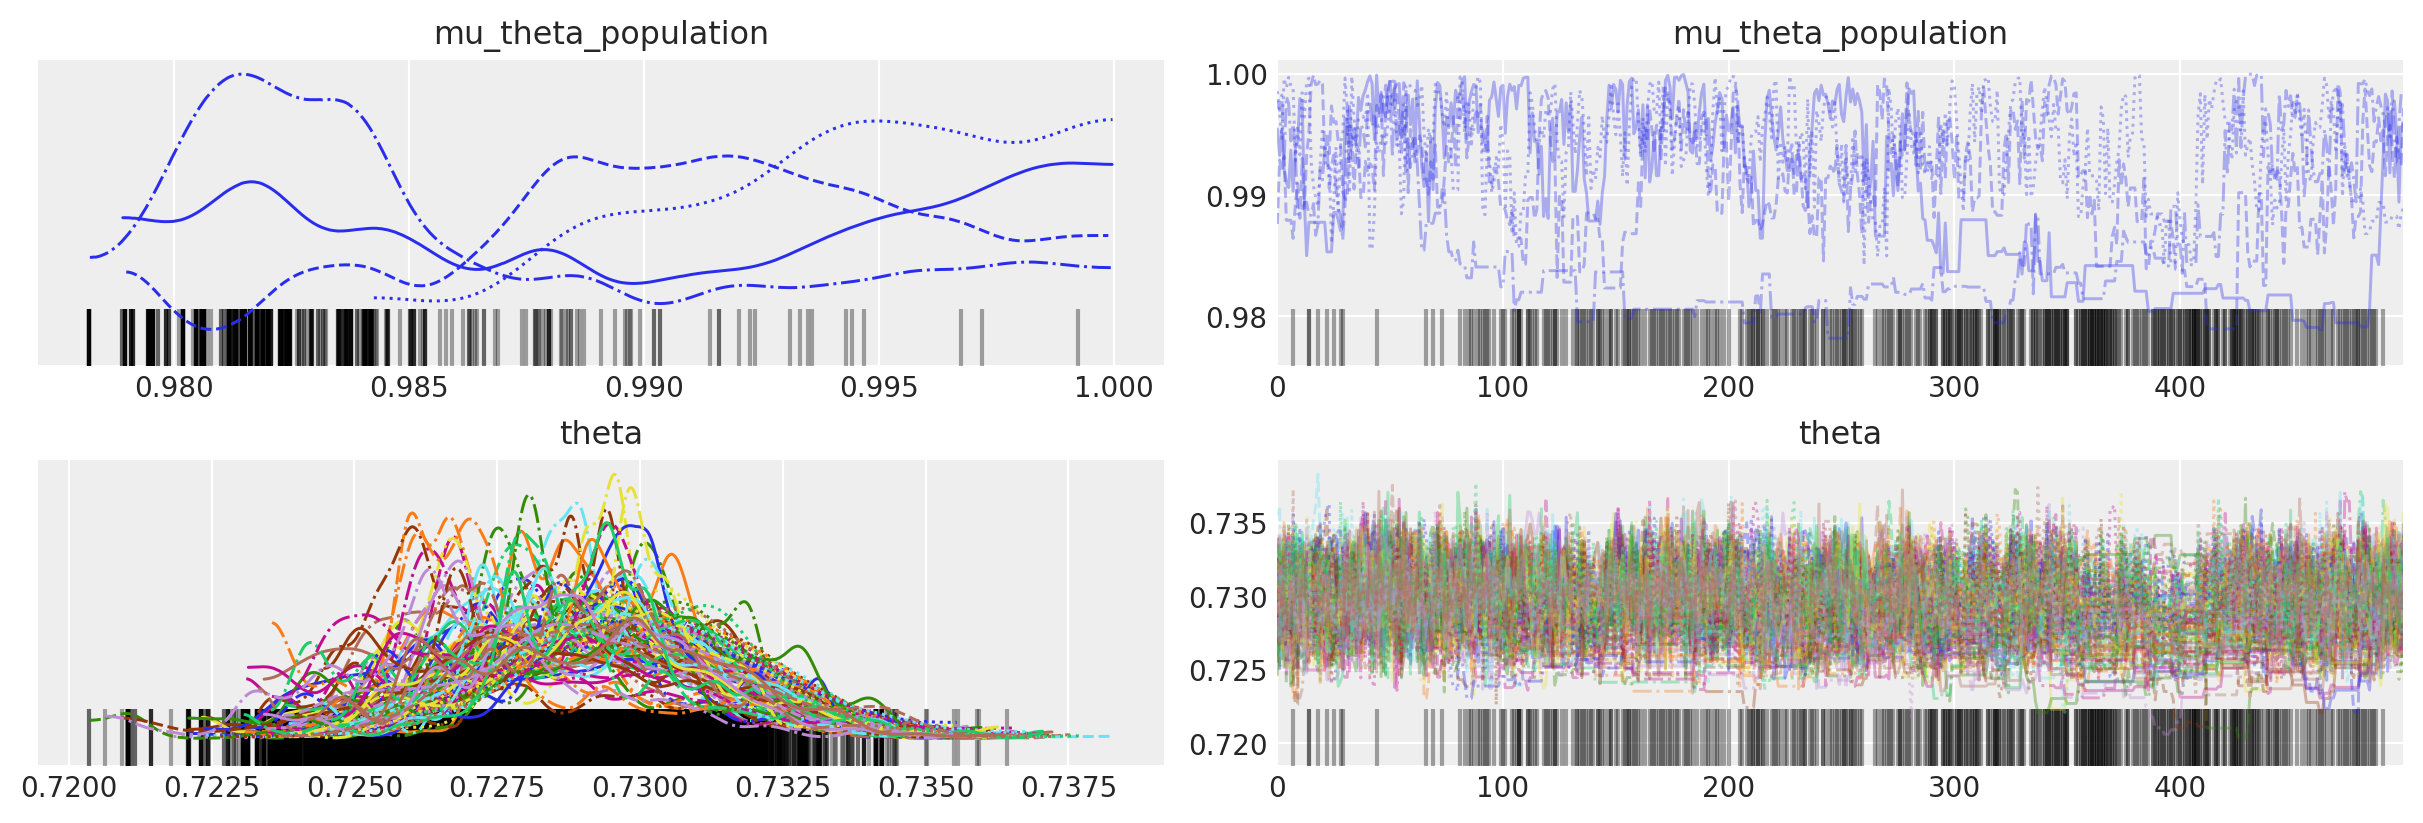

<Figure size 720x480 with 0 Axes>

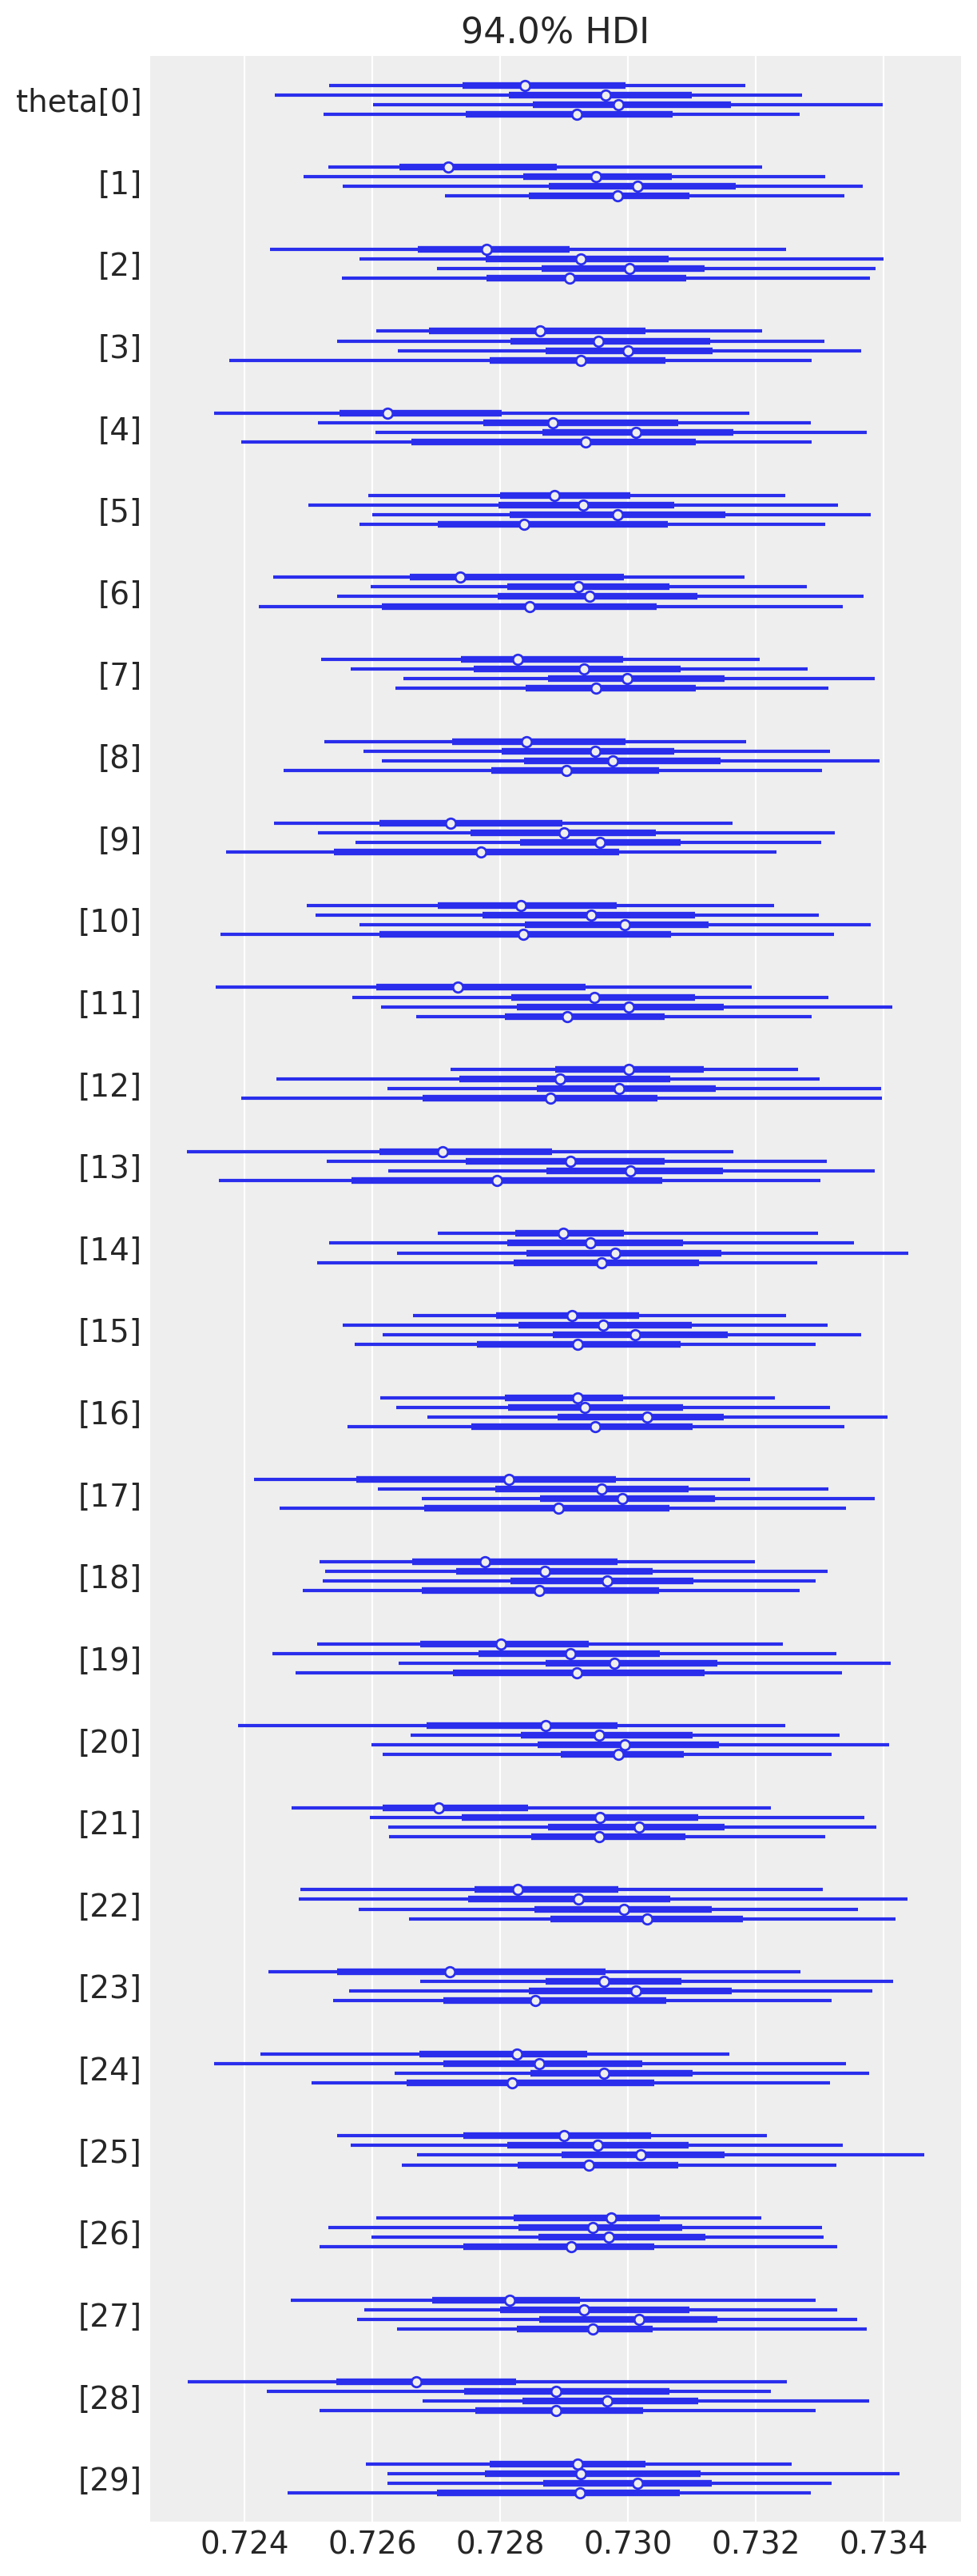

In [13]:
from pymc3 import traceplot, model_to_graphviz
az.plot_trace(unpooled_trace)
plt.figure()
az.plot_forest(unpooled_trace, var_names=['theta'])
az.summary(unpooled_trace)

# Hierarchical model + conditions for that task

In [54]:
df_enum = pd.read_csv("outputs/v1_ubx/enumeration_lfa_v1.csv")
df_wm = pd.read_csv("outputs/v1_ubx/workingmemory_lfa.csv")
df_mot = pd.read_csv("outputs/v1_ubx/moteval_lfa.csv")
df_tsw = pd.read_csv("outputs/v1_ubx/taskswitch_lfa.csv")
df_lb = pd.read_csv("outputs/v1_ubx/loadblindness_lfa.csv")
df_go = pd.read_csv("outputs/v1_ubx/gonogo_lfa.csv")
df_go.head()

participant_id task_status condition  HR-accuracy  FAR-accuracy       HR-rt
0             228    PRE_TEST     zpdes         0.68          0.04  602.958333
1             228   POST_TEST     zpdes         0.72          0.00  622.280000
2             231    PRE_TEST  baseline         0.72          0.00  540.200000
3             231   POST_TEST  baseline         0.72          0.00  415.720000
4             232    PRE_TEST     zpdes         0.72          0.00  393.440000

In [55]:
df_go.drop(columns=['FAR-accuracy'], axis=1, inplace=True)
tasks = [df_enum, df_wm, df_mot, df_tsw, df_lb, df_go]
tasks_name = ['enumeration', 'workingmemory', 'mot', 'taskswitch', 'loadblindness', 'gonogo']
for task in tasks: 
    task['mean_acc'] = task[[col for col in task if 'ac' in col]].mean(axis=1)
    print(task.head())

   participant_id task_status condition  5-accuracy  6-accuracy  7-accuracy  \
0             228    PRE_TEST     zpdes        0.90        0.90        0.40   
1             228   POST_TEST     zpdes        0.95        0.85        0.65   
2             231    PRE_TEST  baseline        1.00        0.65        0.50   
3             231   POST_TEST  baseline        0.85        0.85        0.80   
4             232    PRE_TEST     zpdes        0.85        0.85        0.60   

   8-accuracy  9-accuracy  mean_acc  
0        0.40        0.00      0.52  
1        0.25        0.05      0.55  
2        0.45        0.55      0.63  
3        0.50        0.25      0.65  
4        0.35        0.10      0.55  
   participant_id task_status condition  4-accuracy  5-accuracy  6-accuracy  \
0             228    PRE_TEST     zpdes    0.416667    0.083333    0.083333   
1             228   POST_TEST     zpdes    0.916667    0.750000    0.583333   
2             231    PRE_TEST  baseline    1.000000    0.916

In [ ]:
# Let's do a very quick t-test

In [57]:
from scipy import stats
for idx, task in enumerate(tasks): 
    task['diff'] = task.groupby('participant_id').apply(lambda x: x['mean_acc'] - x['mean_acc'].shift(1)).reset_index(drop=True)
    tmp_task_zpdes = task[task['condition']=='zpdes'].dropna()
    print(tmp_task_zpdes)
    print(tmp_task_zpdes.describe()['diff'])
    tmp_task_baseline = task[task['condition']=='baseline'].dropna()
    print(tmp_task_baseline.describe()['diff'])
    print(tasks_name[idx], stats.ttest_ind(tmp_task_zpdes['diff'], tmp_task_baseline['diff']))
    print('\n')

    participant_id task_status condition  5-accuracy  6-accuracy  7-accuracy  \
1              228   POST_TEST     zpdes        0.95        0.85        0.65   
5              232   POST_TEST     zpdes        0.90        0.90        0.65   
7              233   POST_TEST     zpdes        0.85        0.80        0.80   
9              234   POST_TEST     zpdes        0.95        1.00        0.95   
13             247   POST_TEST     zpdes        0.65        0.55        0.55   
23             261   POST_TEST     zpdes        0.80        0.65        0.65   
27             265   POST_TEST     zpdes        0.65        0.40        0.45   
31             268   POST_TEST     zpdes        0.90        0.85        0.70   
33             270   POST_TEST     zpdes        0.45        0.60        0.50   
38             277   POST_TEST     zpdes        1.00        0.85        0.80   
40             280   POST_TEST     zpdes        1.00        0.75        0.70   

    8-accuracy  9-accuracy  mean_acc   

count    11.000000
mean     -0.024438
std       0.067829
min      -0.148148
25%      -0.063636
50%      -0.019048
75%       0.022727
max       0.080000
Name: diff, dtype: float64
taskswitch Ttest_indResult(statistic=0.40171253978827487, pvalue=0.6921558854372987)


    participant_id task_status condition  accuracy_near  accuracy_far  \
1              228   POST_TEST     zpdes           0.70          0.60   
5              232   POST_TEST     zpdes           0.75          0.40   
7              233   POST_TEST     zpdes           0.80          0.60   
9              234   POST_TEST     zpdes           0.70          0.75   
13             247   POST_TEST     zpdes           0.35          0.40   
23             261   POST_TEST     zpdes           0.80          0.55   
27             265   POST_TEST     zpdes           0.65          0.70   
31             268   POST_TEST     zpdes           1.00          0.80   
33             270   POST_TEST     zpdes           0.60          0.80   
39  

In [ ]:
# For each task and each condition accuracy, let's 

# Hierarchical model + conditions + pre-test/post-test difference

In [34]:
df_enum.dropna()

participant_id task_status condition  5-accuracy  6-accuracy  7-accuracy  \
1              228   POST_TEST     zpdes        0.95        0.85        0.65   
3              231   POST_TEST  baseline        0.85        0.85        0.80   
5              232   POST_TEST     zpdes        0.90        0.90        0.65   
7              233   POST_TEST     zpdes        0.85        0.80        0.80   
9              234   POST_TEST     zpdes        0.95        1.00        0.95   
11             246   POST_TEST  baseline        0.75        0.60        0.45   
13             247   POST_TEST     zpdes        0.65        0.55        0.55   
15             251   POST_TEST  baseline        0.90        0.85        0.75   
17             254   POST_TEST  baseline        0.70        0.85        0.40   
19             257   POST_TEST  baseline        0.95        0.85        0.85   
21             260   POST_TEST  baseline        0.75        0.35        0.40   
23             261   POST_TEST     zpdes        0.80        0.65        0.65   
25             263   POST_TEST  baseline        0.90        0.75        0.40   
27             265   POST_TEST     zpdes        0.65        0.40        0.45   
29             267   POST_TEST  baseline        0.90        0.80        0.60   
31             268   POST_TEST     zpdes        0.90        0.85        0.70   
33             270   POST_TEST     zpdes        0.45        0.60        0.50   
35             272   POST_TEST  baseline        0.85        0.70        0.65   
38             277   POST_TEST     zpdes        1.00        0.85        0.80   
40             280   POST_TEST     zpdes        1.00        0.75        0.70   
42             281   POST_TEST  baseline        0.85        0.95        0.90   

    8-accuracy  9-accuracy  mean_acc          diff  
1         0.25        0.05      0.55  3.000000e-02  
3         0.50        0.25      0.65  2.000000e-02  
5         0.30        0.15      0.58  3.000000e-02  
7         0.70        0.60      0.75  7.000000e-02  
9         0.85        0.60      0.87  1.700000e-01  
11        0.15        0.00      0.39 -1.100000e-01  
13        0.25        0.35      0.47  4.000000e-02  
15        0.70        0.45      0.73  2.220446e-16  
17        0.05        0.10      0.42 -8.000000e-02  
19        0.75        0.55      0.79  1.100000e-01  
21        0.40        0.35      0.45  5.000000e-02  
23        0.55        0.45      0.62 -6.000000e-02  
25        0.60        0.10      0.55  3.000000e-02  
27        0.50        0.30      0.46  8.000000e-02  
29        0.70        0.55      0.71 -3.000000e-02  
31        0.60        0.25      0.66  1.000000e-02  
33        0.55        0.55      0.53  1.000000e-01  
35        0.30        0.35      0.57  3.000000e-02  
38        0.70        0.35      0.74  3.000000e-02  
40        0.45        0.10      0.60  1.110223e-16  
42        0.50        0.40      0.72 -2.000000e-02

# Hierarchical model + conditions + pre-test/post-test difference + group condition (ZPDES vs Baseline)